<a href="https://colab.research.google.com/github/CodeHunterOfficial/ABC_DataMining/blob/main/ML/3_2_Feature_Engineering_Dimension_Reduction_%D0%9A%D0%BE%D0%BD%D1%82%D1%80%D0%BE%D0%BB%D0%B8%D1%80%D1%83%D0%B5%D0%BC%D1%8B%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_(Supervised_Methods).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. Feature Engineering. Снижение размерности (Dimension Reduction)
### Оглавление

### 1. **Снижение размерности (Dimension Reduction)**  
#### 1.1 **Неконтролируемые методы (Unsupervised Methods)**  
   - 1.1.1 Метод главных компонент (PCA, Principal Components Analysis)  
   - 1.1.2 Ядерный метод главных компонент (Kernel PCA, Kernel Principal Components Analysis)  
   - 1.1.3 t-SNE (t-Distributed Stochastic Neighbor Embedding)  
   - 1.1.4 UMAP (Uniform Manifold Approximation and Projection)  
   - 1.1.5 Метод независимых компонент (ICA, Independent Component Analysis)  
   - 1.1.6 Неотрицательная матричная факторизация (NMF, Non-Negative Matrix Factorization)  
   - 1.1.7 Автоэнкодеры (Autoencoders, Neural Network-Based Dimensionality Reduction)  
   - 1.1.8 Изометрическое отображение (Isomap, Isometric Mapping)  
   - 1.1.9 Локально линейное вложение (LLE, Locally Linear Embedding)  
   - 1.1.10 Собственные отображения Лапласа (Laplacian Eigenmaps)  

#### 1.2 **Контролируемые методы (Supervised Methods)**  
   - 1.2.1 Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis)  
   - 1.2.2 Квадратичный дискриминантный анализ (QDA, Quadratic Discriminant Analysis)  
   - 1.2.3 Метод частичных наименьших квадратов (PLS, Partial Least Squares)  
   - 1.2.4 Обобщенный дискриминантный анализ (GDA, Generalized Discriminant Analysis)  
   - 1.2.5 Канонический корреляционный анализ (CCA, Canonical Correlation Analysis)  
   - 1.2.6 Контролируемый метод главных компонент (Supervised PCA, Supervised Principal Components Analysis)  
   - 1.2.7 Дискриминантный анализ Фишера (FDA, Fisher Discriminant Analysis)  


# 1.2 **Контролируемые методы (Supervised Methods)**

Контролируемые методы (Supervised Methods) — это один из основных подходов в машинном обучении, где модель обучается на размеченных данных, то есть на данных, для которых известны правильные ответы (метки классов или целевые значения). Цель контролируемого обучения — построить модель, которая сможет предсказывать метки для новых, ранее не встречавшихся данных. Эти методы широко применяются в задачах классификации (когда нужно отнести объект к одному из классов) и регрессии (когда нужно предсказать числовое значение).




##1.2.1 Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis)



#### Введение

Линейный дискриминантный анализ (LDA, Linear Discriminant Analysis) — это один из ключевых методов машинного обучения, который используется для снижения размерности данных и классификации. Основная цель LDA — найти такие линейные комбинации признаков, которые наилучшим образом разделяют классы. В отличие от метода главных компонент (PCA), который максимизирует общую дисперсию данных, LDA фокусируется на максимизации разделимости классов.

LDA широко применяется в задачах распознавания образов, анализа данных, биоинформатики и других областях, где важно учитывать информацию о классах. В этой лекции мы подробно разберём математические основы LDA, его алгоритм, а также обсудим его преимущества и ограничения.



#### Основные понятия и постановка задачи

1. **Данные и классы**:
   Предположим, у нас есть набор данных $X = \{x_1, x_2, \dots, x_n\}$, где каждый объект $x_i$ — это вектор признаков размерности $D$. Каждый объект принадлежит одному из $K$ классов. Обозначим классы как $C_1, C_2, \dots, C_K$.

2. **Цель LDA**:
   LDA стремится найти такое направление (или набор направлений) в пространстве признаков, при котором проекции объектов разных классов максимально разделены, а проекции объектов одного класса максимально сгруппированы. Это достигается за счёт максимизации отношения межклассовой дисперсии к внутриклассовой дисперсии.

3. **Математическая формулировка**:
   Формально задача LDA заключается в нахождении вектора $w$, который максимизирует критерий Фишера:

$$
   J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

   где:
   - $S_B$ — межклассовая матрица рассеяния (between-class scatter matrix).
   - $S_W$ — внутриклассовая матрица рассеяния (within-class scatter matrix).



#### Матрицы рассеяния

1. **Внутриклассовая матрица рассеяния $S_W$**:
   Эта матрица описывает разброс объектов внутри каждого класса. Она вычисляется как сумма ковариационных матриц каждого класса:

$$
   S_W = \sum_{k=1}^K \sum_{x_i \in C_k} (x_i - \mu_k)(x_i - \mu_k)^T
$$

   где:
   - $C_k$ — множество объектов, принадлежащих классу $k$.
   - $\mu_k$ — среднее значение объектов класса $k$:
  $$
     \mu_k = \frac{1}{N_k} \sum_{x_i \in C_k} x_i
  $$
     где $N_k$ — количество объектов в классе $k$.

2. **Межклассовая матрица рассеяния $S_B$**:
   Эта матрица описывает разброс между средними значениями разных классов. Она вычисляется как:

$$
   S_B = \sum_{k=1}^K N_k (\mu_k - \mu)(\mu_k - \mu)^T
$$

   где:
   - $N_k$ — количество объектов в классе $k$.
   - $\mu$ — общее среднее значение всех объектов:
  $$
     \mu = \frac{1}{N} \sum_{i=1}^N x_i
  $$
     где $N$ — общее количество объектов.



#### Максимизация критерия Фишера

Критерий Фишера $J(w)$ определяется как отношение межклассовой дисперсии к внутриклассовой дисперсии:

$$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

Наша цель — найти такой вектор $w$, который максимизирует это отношение. Для этого необходимо решить задачу оптимизации:

$$
\max_w J(w) = \max_w \frac{w^T S_B w}{w^T S_W w}
$$



#### Решение задачи оптимизации

1. **Градиентный подход**:
   Чтобы найти максимум $J(w)$, воспользуемся методом множителей Лагранжа. Введём ограничение $w^T S_W w = 1$, чтобы упростить задачу. Тогда задача оптимизации примет вид:

$$
   \max_w w^T S_B w \quad \text{при условии} \quad w^T S_W w = 1
$$

2. **Функция Лагранжа**:
   Составим функцию Лагранжа:

$$
   \mathcal{L}(w, \lambda) = w^T S_B w - \lambda (w^T S_W w - 1)
$$

   где $\lambda$ — множитель Лагранжа.

3. **Дифференцирование по $w$**:
   Продифференцируем функцию Лагранжа по $w$ и приравняем производную к нулю:

$$
   \frac{\partial \mathcal{L}}{\partial w} = 2 S_B w - 2 \lambda S_W w = 0
$$

   Упростив, получим:

$$
   S_B w = \lambda S_W w
$$

   Это уравнение известно как обобщённая задача на собственные значения.

4. **Решение обобщённой задачи на собственные значения**:
   Чтобы найти $w$, необходимо решить уравнение:

$$
   S_W^{-1} S_B w = \lambda w
$$

   Здесь $S_W^{-1} S_B$ — матрица, а $\lambda$ — её собственное значение, соответствующее собственному вектору $w$.

5. **Интерпретация собственных значений и векторов**:
   - Собственные значения $\lambda$ показывают, насколько хорошо соответствующие собственные векторы $w$ разделяют классы.
   - Собственные векторы $w$ определяют направления в пространстве признаков, вдоль которых классы максимально разделены.



#### Выбор оптимальных направлений

1. **Ранг матрицы $S_B$**:
   Матрица $S_B$ имеет ранг не более $K-1$, где $K$ — количество классов. Это означает, что существует не более $K-1$ независимых направлений, которые можно использовать для разделения классов.

2. **Собственные векторы**:
   Для нахождения оптимальных направлений выбираются собственные векторы, соответствующие наибольшим собственным значениям. Эти векторы образуют матрицу проекции $W$:

$$
   W = [w_1, w_2, \dots, w_{K-1}]
$$

   где $w_1, w_2, \dots, w_{K-1}$ — собственные векторы, упорядоченные по убыванию собственных значений.

3. **Проекция данных**:
   Данные проецируются на новое пространство с помощью матрицы $W$:

$$
   y_i = W^T x_i
$$

   где $y_i$ — проекция объекта $x_i$ на новое пространство размерности $K-1$.



#### Геометрическая интерпретация

1. **Внутриклассовая дисперсия**:
   Внутриклассовая дисперсия $w^T S_W w$ характеризует разброс объектов внутри каждого класса после проекции на направление $w$. Чем меньше это значение, тем более компактно расположены объекты одного класса.

2. **Межклассовая дисперсия**:
   Межклассовая дисперсия $w^T S_B w$ характеризует расстояние между средними значениями разных классов после проекции на направление $w$. Чем больше это значение, тем дальше друг от друга находятся классы.

3. **Максимизация отношения**:
   Максимизация отношения $\frac{w^T S_B w}{w^T S_W w}$ означает поиск такого направления $w$, при котором классы максимально удалены друг от друга, а объекты внутри каждого класса максимально сгруппированы.



#### Преимущества и ограничения LDA

1. **Преимущества**:
   - LDA эффективно снижает размерность данных, сохраняя информацию о разделимости классов.
   - Метод устойчив к переобучению, особенно при небольшом количестве обучающих данных.
   - LDA может быть использован как для классификации, так и для визуализации данных.

2. **Ограничения**:
   - LDA предполагает, что данные каждого класса имеют нормальное распределение.
   - Классы должны иметь одинаковую ковариационную матрицу.
   - LDA может быть неэффективен, если классы сильно перекрываются в исходном пространстве.



Линейный дискриминантный анализ (LDA) — это мощный метод, который позволяет эффективно снижать размерность данных, сохраняя информацию о разделимости классов. Основная идея LDA заключается в максимизации отношения межклассовой дисперсии к внутриклассовой дисперсии, что достигается через решение обобщённой задачи на собственные значения.

Метод имеет свои ограничения, такие как предположение о нормальности распределения данных и равенстве ковариационных матриц классов. Однако при выполнении этих условий LDA демонстрирует высокую эффективность в задачах классификации и визуализации данных.

Таким образом, LDA является важным инструментом в машинном обучении, который позволяет не только снижать размерность данных, но и улучшать качество классификации за счёт учёта информации о классах.




Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что первые две точки принадлежат классу $C_1$, а последние две — классу $C_2$. Наша цель — применить линейный дискриминантный анализ (LDA) для нахождения направления, которое наилучшим образом разделяет эти два класса.



#### Шаг 1: Вычисление средних значений классов

1. **Среднее значение класса $C_1$**:
$$
   \mu_1 = \frac{1}{2} \left( \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} \right) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix}
$$

2. **Среднее значение класса $C_2$**:
$$
   \mu_2 = \frac{1}{2} \left( \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} + \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} \right) = \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix}
$$

3. **Общее среднее значение $\mu$**:
$$
   \mu = \frac{1}{4} \left( \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} + \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} + \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} \right) = \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix}
$$



#### Шаг 2: Вычисление внутриклассовой матрицы рассеяния $S_W$

Внутриклассовая матрица рассеяния $S_W$ вычисляется как сумма ковариационных матриц каждого класса.

1. **Для класса $C_1$**:
$$
   S_{W1} = \sum_{x_i \in C_1} (x_i - \mu_1)(x_i - \mu_1)^T
$$
   Вычислим для каждой точки:
$$
   (x_1 - \mu_1) = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix}
$$
$$
   (x_1 - \mu_1)(x_1 - \mu_1)^T = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix} \begin{bmatrix} -1.5 & -1.5 & -1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
$$
   Аналогично для $x_2$:
$$
   (x_2 - \mu_1) = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix}
$$
$$
   (x_2 - \mu_1)(x_2 - \mu_1)^T = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix} \begin{bmatrix} 1.5 & 1.5 & 1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
$$
   Суммируем:
$$
   S_{W1} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix}
$$

2. **Для класса $C_2$**:
   Аналогично вычисляем $S_{W2}$:
$$
   S_{W2} = \sum_{x_i \in C_2} (x_i - \mu_2)(x_i - \mu_2)^T
$$
   Вычисления аналогичны классу $C_1$, и в результате получим:
$$
   S_{W2} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix}
$$

3. **Итоговая внутриклассовая матрица рассеяния $S_W$**:
$$
   S_W = S_{W1} + S_{W2} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix} + \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$



#### Шаг 3: Вычисление межклассовой матрицы рассеяния $S_B$

Межклассовая матрица рассеяния $S_B$ вычисляется как:

$$
S_B = \sum_{k=1}^K N_k (\mu_k - \mu)(\mu_k - \mu)^T
$$

1. **Для класса $C_1$**:
$$
   (\mu_1 - \mu) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} - \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix}
$$
$$
   (\mu_1 - \mu)(\mu_1 - \mu)^T = \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix} \begin{bmatrix} -3 & -3 & -3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$
   Учитывая $N_1 = 2$:
$$
   N_1 (\mu_1 - \mu)(\mu_1 - \mu)^T = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix}
$$

2. **Для класса $C_2$**:
$$
   (\mu_2 - \mu) = \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix} - \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix}
$$
$$
   (\mu_2 - \mu)(\mu_2 - \mu)^T = \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix} \begin{bmatrix} 3 & 3 & 3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$
   Учитывая $N_2 = 2$:
$$
   N_2 (\mu_2 - \mu)(\mu_2 - \mu)^T = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix}
$$

3. **Итоговая межклассовая матрица рассеяния $S_B$**:
$$
   S_B = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix} + \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix} = \begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix}
$$

### Шаг 4: Решение обобщённой задачи на собственные значения

Теперь мы переходим к ключевому этапу линейного дискриминантного анализа (LDA) — решению обобщённой задачи на собственные значения. Наша цель — найти вектор $w$, который максимизирует критерий Фишера:

$$
J(w) = \frac{w^T S_B w}{w^T S_W w}
$$

Это эквивалентно решению уравнения:

$$
S_W^{-1} S_B w = \lambda w
$$

где:
- $S_W$ — внутриклассовая матрица рассеяния.
- $S_B$ — межклассовая матрица рассеяния.
- $\lambda$ — собственное значение, соответствующее собственному вектору $w$.



#### Подробное решение

1. **Проверка обратимости матрицы $S_W$**:
   Прежде чем решать уравнение, необходимо убедиться, что матрица $S_W$ обратима. В нашем примере:

$$
   S_W = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
$$

   Определитель этой матрицы равен нулю, так как все строки линейно зависимы. Это означает, что $S_W$ — вырожденная матрица, и обратной матрицы $S_W^{-1}$ не существует.

2. **Регуляризация матрицы $S_W$**:
   Чтобы обойти проблему вырожденности, можно добавить небольшое значение $\alpha$ к диагональным элементам матрицы $S_W$. Это называется регуляризацией:

$$
   S_W' = S_W + \alpha I
$$

   где $I$ — единичная матрица, а $\alpha$ — параметр регуляризации (например, $\alpha = 0.01$).

   После регуляризации:

$$
   S_W' = \begin{bmatrix} 9.01 & 9 & 9 \\ 9 & 9.01 & 9 \\ 9 & 9 & 9.01 \end{bmatrix}
$$

   Теперь матрица $S_W'$ обратима.

3. **Вычисление обратной матрицы $S_W'^{-1}$**:
   Обратная матрица $S_W'^{-1}$ вычисляется с использованием стандартных методов линейной алгебры. В данном случае:

$$
   S_W'^{-1} \approx \begin{bmatrix} 111.11 & -111.11 & -111.11 \\ -111.11 & 111.11 & -111.11 \\ -111.11 & -111.11 & 111.11 \end{bmatrix}
$$

   (Значения округлены для упрощения.)

4. **Вычисление матрицы $S_W'^{-1} S_B$**:
   Теперь вычислим матрицу $S_W'^{-1} S_B$:

$$
   S_W'^{-1} S_B = S_W'^{-1} \begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix}
$$

   Умножение даёт:

$$
   S_W'^{-1} S_B \approx \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}
$$

   Это означает, что все собственные значения $\lambda$ равны нулю, что указывает на отсутствие полезных направлений для разделения классов.

5. **Интерпретация результата**:
   В данном примере все собственные значения равны нулю, что говорит о том, что данные не могут быть разделены с помощью LDA. Это связано с тем, что:
   - Все точки в каждом классе идентичны (разброс внутри классов равен нулю).
   - Средние значения классов также не различаются (разброс между классами равен нулю).



#### Общий алгоритм решения обобщённой задачи на собственные значения

Если матрица $S_W$ не вырождена, то решение обобщённой задачи на собственные значения выполняется следующим образом:

1. **Вычисление обратной матрицы $S_W^{-1}$**:
   Если $S_W$ обратима, находим $S_W^{-1}$.

2. **Вычисление матрицы $S_W^{-1} S_B$**:
   Умножаем $S_W^{-1}$ на $S_B$.

3. **Нахождение собственных значений и векторов**:
   Решаем уравнение:

$$
   S_W^{-1} S_B w = \lambda w
$$

   Это стандартная задача на собственные значения, которая решается с использованием численных методов (например, метода QR-разложения).

4. **Выбор собственных векторов**:
   Собственные векторы, соответствующие наибольшим собственным значениям, дают направления, которые наилучшим образом разделяют классы.

5. **Проекция данных**:
   Данные проецируются на новое пространство с использованием выбранных собственных векторов.





Реализуем пример линейного дискриминантного анализа (LDA) на Python. Сначала создадим класс LDA с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация LDA с нуля


In [ ]:
import numpy as np

class LDA:
    def __init__(self, alpha=0.01):
        self.w = None  # Вектор весов (направление проекции)
        self.alpha = alpha  # Параметр регуляризации

    def fit(self, X, y):
        """
        Обучение модели LDA.
        :param X: Матрица признаков (n_samples, n_features).
        :param y: Вектор меток классов (n_samples,).
        """
        n_features = X.shape[1]
        classes = np.unique(y)

        # Вычисление средних значений для каждого класса
        class_means = []
        for c in classes:
            class_means.append(np.mean(X[y == c], axis=0))
        class_means = np.array(class_means)

        # Общее среднее значение
        overall_mean = np.mean(X, axis=0)

        # Внутриклассовая матрица рассеяния (S_W)
        S_W = np.zeros((n_features, n_features))
        for c, mean in zip(classes, class_means):
            class_scatter = np.zeros((n_features, n_features))
            for sample in X[y == c]:
                sample, mean = sample.reshape(n_features, 1), mean.reshape(n_features, 1)
                class_scatter += (sample - mean).dot((sample - mean).T)
            S_W += class_scatter

        # Регуляризация матрицы S_W
        S_W += self.alpha * np.eye(n_features)

        # Межклассовая матрица рассеяния (S_B)
        S_B = np.zeros((n_features, n_features))
        for c, mean in zip(classes, class_means):
            n_c = X[y == c].shape[0]
            mean = mean.reshape(n_features, 1)
            overall_mean = overall_mean.reshape(n_features, 1)
            S_B += n_c * (mean - overall_mean).dot((mean - overall_mean).T)

        # Решение обобщённой задачи на собственные значения
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

        # Сортировка собственных векторов по убыванию собственных значений
        idx = eigenvalues.argsort()[::-1]
        eigenvectors = eigenvectors[:, idx]

        # Выбор первого собственного вектора (направление проекции)
        self.w = eigenvectors[:, 0]

    def transform(self, X):
        """
        Проекция данных на новое пространство.
        :param X: Матрица признаков (n_samples, n_features).
        :return: Проекция данных (n_samples, 1).
        """
        return X.dot(self.w)


# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])  # Метки классов

# Создаём объект LDA с регуляризацией
lda_custom = LDA(alpha=0.01)

# Обучаем модель
lda_custom.fit(X, y)

# Проецируем данные
X_transformed_custom = lda_custom.transform(X)
print("Проекция данных (с нуля, с регуляризацией):\n", X_transformed_custom)

Проекция данных (с нуля, с регуляризацией):
 [ 3.46410162  8.66025404 13.85640646 19.05255888]


2. Использование готового решения из scikit-learn

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Готовое решение LDA
lda_sklearn = LinearDiscriminantAnalysis()

# Данные
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])  # Метки классов

# Обучаем модель
lda_sklearn.fit(X, y)

# Проецируем данные
X_transformed_sklearn = lda_sklearn.transform(X)
print("Проекция данных (scikit-learn):\n", X_transformed_sklearn)

Проекция данных (scikit-learn):
 [[-2.12132034]
 [-0.70710678]
 [ 0.70710678]
 [ 2.12132034]]


##1.2.2 Квадратичный дискриминантный анализ (QDA, Quadratic Discriminant Analysis)



#### Введение

Квадратичный дискриминантный анализ (QDA, Quadratic Discriminant Analysis) — это метод классификации, который используется для разделения объектов на классы на основе их признаков. QDA является обобщением линейного дискриминантного анализа (LDA), но, в отличие от LDA, QDA не предполагает, что ковариационные матрицы всех классов одинаковы. Это позволяет QDA учитывать более сложные структуры данных, где классы могут иметь различную форму и ориентацию в пространстве признаков.



#### Основные понятия

1. **Классификация**:
   Задача классификации заключается в отнесении объекта к одному из нескольких классов на основе его признаков. В QDA предполагается, что данные каждого класса распределены по многомерному нормальному распределению.

2. **Многомерное нормальное распределение**:
   Для класса $k$ вероятность наблюдения вектора признаков $\mathbf{x}$ задается плотностью многомерного нормального распределения:
$$
   P(\mathbf{x} | Y = k) = \frac{1}{(2\pi)^{p/2} |\mathbf{\Sigma}_k|^{1/2}} \exp\left(-\frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{x} - \mathbf{\mu}_k)\right),
$$
   где:
   - $\mathbf{x}$ — вектор признаков размерности $p$,
   - $Y = k$ — принадлежность объекта к классу $k$,
   - $\mathbf{\mu}_k$ — вектор средних значений для класса $k$,
   - $\mathbf{\Sigma}_k$ — ковариационная матрица для класса $k$,
   - $|\mathbf{\Sigma}_k|$ — определитель ковариационной матрицы.

3. **Апостериорная вероятность**:
   QDA использует теорему Байеса для вычисления апостериорной вероятности принадлежности объекта к классу $k$:
$$
   P(Y = k | \mathbf{x}) = \frac{P(\mathbf{x} | Y = k) P(Y = k)}{P(\mathbf{x})},
$$
   где:
   - $P(Y = k)$ — априорная вероятность класса $k$,
   - $P(\mathbf{x})$ — нормировочная константа, которая не зависит от класса.

4. **Решающее правило**:
   Объект $\mathbf{x}$ относится к классу $k$, для которого апостериорная вероятность $P(Y = k | \mathbf{x})$ максимальна. Это эквивалентно максимизации логарифма апостериорной вероятности:
$$
   \delta_k(\mathbf{x}) = \log P(Y = k) - \frac{1}{2} \log |\mathbf{\Sigma}_k| - \frac{1}{2} (\mathbf{x} - \mathbf{\mu}_k)^T \mathbf{\Sigma}_k^{-1} (\mathbf{x} - \mathbf{\mu}_k).
$$
   Здесь $\delta_k(\mathbf{x})$ называется дискриминантной функцией для класса $k$.



#### Сравнение QDA и LDA

Квадратичный дискриминантный анализ (QDA) очень похож на линейный дискриминантный анализ (LDA), но с одним ключевым отличием: в QDA мы отказываемся от предположения, что средние значения и ковариационные матрицы всех классов одинаковы. Вместо этого для каждого класса $y$ мы оцениваем отдельные средние значения $\mu_y$ и ковариационные матрицы $\Sigma_y$. Это позволяет QDA учитывать более сложные структуры данных, где классы могут иметь различную форму и ориентацию в пространстве признаков.



#### Оценка ковариационной матрицы для каждого класса

Для каждого класса $y$ ковариационная матрица $\Sigma_y$ оценивается по формуле:
$$
\Sigma_y = \frac{1}{N_y - 1} \sum_{y_i = y} (x_i - \mu_y)(x_i - \mu_y)^T,
$$
где:
- $N_y$ — количество объектов в классе $y$,
- $x_i$ — вектор признаков $i$-го объекта,
- $\mu_y$ — вектор средних значений для класса $y$, вычисляемый как:
  $$
  \mu_y = \frac{1}{N_y} \sum_{y_i = y} x_i.
  $$

Эта формула аналогична оценке ковариационной матрицы в LDA, но в QDA она вычисляется отдельно для каждого класса.



#### Квадратичная дискриминантная функция

Дискриминантная функция $\delta_k(x)$ в QDA имеет квадратичную форму и выражается следующим образом:
$$
\delta_k(x) = \log \pi_k - \frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k + x^T \Sigma_k^{-1} \mu_k - \frac{1}{2} x^T \Sigma_k^{-1} x - \frac{1}{2} \log |\Sigma_k|.
$$

Давайте разберем каждый член этой функции:

1. **$\log \pi_k$**:
   Это логарифм априорной вероятности класса $k$. Априорная вероятность $\pi_k$ оценивается как доля объектов класса $k$ в обучающей выборке:
$$
   \pi_k = \frac{N_k}{N},
$$
   где $N_k$ — количество объектов в классе $k$, а $N$ — общее количество объектов.

2. **$-\frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k$**:
   Этот член представляет собой квадратичную форму, связанную с центром класса $k$. Он учитывает положение центра класса в пространстве признаков.

3. **$x^T \Sigma_k^{-1} \mu_k$**:
   Это линейный член, который связывает объект $x$ с центром класса $k$. Он учитывает "близость" объекта $x$ к центру класса $k$ в метрике, заданной ковариационной матрицей $\Sigma_k$.

4. **$-\frac{1}{2} x^T \Sigma_k^{-1} x$**:
   Это квадратичный член, который учитывает "расстояние" объекта $x$ до центра класса $k$ в метрике, заданной ковариационной матрицей $\Sigma_k$.

5. **$-\frac{1}{2} \log |\Sigma_k|$**:
   Этот член учитывает "объём" ковариационной матрицы класса $k$. Чем больше разброс данных в классе, тем меньше значение этого члена.



#### Вывод дискриминантной функции

Дискриминантная функция $\delta_k(x)$ получается путём логарифмирования апостериорной вероятности $P(Y = k | x)$ и упрощения выражения. Напомним, что апостериорная вероятность задаётся по теореме Байеса:
$$
P(Y = k | x) = \frac{P(x | Y = k) P(Y = k)}{P(x)}.
$$

Логарифмируя это выражение и опуская нормировочную константу $P(x)$, получаем:
$$
\log P(Y = k | x) = \log P(x | Y = k) + \log P(Y = k).
$$

Подставляя выражение для плотности многомерного нормального распределения $P(x | Y = k)$, получаем:
$$
\log P(Y = k | x) = -\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) - \frac{1}{2} \log |\Sigma_k| + \log \pi_k + \text{const}.
$$

Раскрывая квадратичную форму $(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k)$, получаем:
$$
(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) = x^T \Sigma_k^{-1} x - 2 x^T \Sigma_k^{-1} \mu_k + \mu_k^T \Sigma_k^{-1} \mu_k.
$$

Подставляя это обратно в выражение для $\log P(Y = k | x)$, получаем окончательную формулу для дискриминантной функции:
$$
\delta_k(x) = \log \pi_k - \frac{1}{2} \mu_k^T \Sigma_k^{-1} \mu_k + x^T \Sigma_k^{-1} \mu_k - \frac{1}{2} x^T \Sigma_k^{-1} x - \frac{1}{2} \log |\Sigma_k|.
$$



#### Преимущества и недостатки QDA

**Преимущества**:
1. QDA позволяет моделировать более сложные границы между классами, чем LDA, благодаря использованию различных ковариационных матриц.
2. Хорошо работает, когда классы имеют различную форму и ориентацию в пространстве признаков.

**Недостатки**:
1. QDA требует оценки большего количества параметров, чем LDA, что может привести к переобучению при малом количестве данных.
2. Вычислительная сложность выше, чем у LDA, из-за необходимости обращения и хранения отдельных ковариационных матриц для каждого класса.



#### Заключение

Квадратичный дискриминантный анализ (QDA) — это мощный метод классификации, который обобщает линейный дискриминантный анализ, позволяя учитывать различные ковариационные структуры для каждого класса. QDA особенно полезен в задачах, где классы имеют сложные формы распределений. Однако его применение требует достаточного количества данных для точной оценки параметров модели.



#### Практическое применение QDA

После получения окончательной формулы для дискриминантной функции в QDA, её можно использовать для классификации новых объектов. Для этого необходимо:
1. Оценить параметры модели (средние значения, ковариационные матрицы и априорные вероятности).
2. Вычислить значение дискриминантной функции для каждого класса.
3. Отнести объект к классу с максимальным значением дискриминантной функции.

QDA является мощным инструментом для задач классификации, особенно когда классы имеют различную форму и ориентацию в пространстве признаков. Однако его применение требует внимательного подхода к оценке параметров и учёта вычислительной сложности.



#### Дополнительные замечания

1. **Регуляризация**:
   В случаях, когда количество данных ограничено, можно использовать регуляризацию для предотвращения переобучения. Например, можно добавить небольшое значение к диагонали ковариационной матрицы, чтобы сделать её более устойчивой.

2. **Вычислительная эффективность**:
   Для ускорения вычислений можно использовать методы оптимизации, такие как разложение Холецкого или LU-разложение, для обращения ковариационных матриц.

3. **Интерпретация результатов**:
   QDA позволяет моделировать сложные границы между классами, но интерпретация этих границ может быть затруднена из-за квадратичной природы дискриминантной функции.



Таким образом, квадратичный дискриминантный анализ (QDA) представляет собой гибкий и мощный метод классификации, который может быть эффективно использован в задачах с нелинейными границами между классами. Однако его применение требует тщательной подготовки данных и внимательного подхода к оценке параметров модели.



Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что первые две точки принадлежат классу 0, а последние две — классу 1. Таким образом, метки классов будут:

$$
y = \begin{bmatrix}
0 \\
0 \\
1 \\
1
\end{bmatrix}
$$



#### Шаг 1: Разделение данных по классам

Разделим данные на два класса:

- **Класс 0**:
  $$
  X_0 = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6
  \end{bmatrix}
  $$

- **Класс 1**:
  $$
  X_1 = \begin{bmatrix}
  7 & 8 & 9 \\
  10 & 11 & 12
  \end{bmatrix}
  $$



#### Шаг 2: Вычисление средних значений для каждого класса

Среднее значение для каждого класса вычисляется как среднее арифметическое по всем точкам класса.

1. **Класс 0**:
$$
   \mu_0 = \frac{1}{2} \begin{bmatrix}
   1 + 4 \\
   2 + 5 \\
   3 + 6
   \end{bmatrix} = \begin{bmatrix}
   2.5 \\
   3.5 \\
   4.5
   \end{bmatrix}
$$

2. **Класс 1**:
$$
   \mu_1 = \frac{1}{2} \begin{bmatrix}
   7 + 10 \\
   8 + 11 \\
   9 + 12
   \end{bmatrix} = \begin{bmatrix}
   8.5 \\
   9.5 \\
   10.5
   \end{bmatrix}
$$



#### Шаг 3: Вычисление ковариационных матриц для каждого класса

Ковариационная матрица для каждого класса вычисляется по формуле:

$$
\Sigma_k = \frac{1}{N_k - 1} \sum_{i=1}^{N_k} (x_i - \mu_k)(x_i - \mu_k)^T,
$$

где $N_k$ — количество точек в классе $k$, $x_i$ — $i$-я точка класса $k$, $\mu_k$ — среднее значение класса $k$.

1. **Класс 0**:
   - Центрируем данные:
  $$
     X_0 - \mu_0 = \begin{bmatrix}
     1 - 2.5 & 2 - 3.5 & 3 - 4.5 \\
     4 - 2.5 & 5 - 3.5 & 6 - 4.5
     \end{bmatrix} = \begin{bmatrix}
     -1.5 & -1.5 & -1.5 \\
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
   - Вычисляем ковариационную матрицу:
  $$
     \Sigma_0 = \frac{1}{2 - 1} \begin{bmatrix}
     -1.5 \\
     -1.5 \\
     -1.5
     \end{bmatrix} \begin{bmatrix}
     -1.5 & -1.5 & -1.5
     \end{bmatrix} + \frac{1}{2 - 1} \begin{bmatrix}
     1.5 \\
     1.5 \\
     1.5
     \end{bmatrix} \begin{bmatrix}
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
  $$
     \Sigma_0 = \begin{bmatrix}
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5
     \end{bmatrix}
  $$

2. **Класс 1**:
   - Центрируем данные:
  $$
     X_1 - \mu_1 = \begin{bmatrix}
     7 - 8.5 & 8 - 9.5 & 9 - 10.5 \\
     10 - 8.5 & 11 - 9.5 & 12 - 10.5
     \end{bmatrix} = \begin{bmatrix}
     -1.5 & -1.5 & -1.5 \\
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
   - Вычисляем ковариационную матрицу:
  $$
     \Sigma_1 = \frac{1}{2 - 1} \begin{bmatrix}
     -1.5 \\
     -1.5 \\
     -1.5
     \end{bmatrix} \begin{bmatrix}
     -1.5 & -1.5 & -1.5
     \end{bmatrix} + \frac{1}{2 - 1} \begin{bmatrix}
     1.5 \\
     1.5 \\
     1.5
     \end{bmatrix} \begin{bmatrix}
     1.5 & 1.5 & 1.5
     \end{bmatrix}
  $$
  $$
     \Sigma_1 = \begin{bmatrix}
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5 \\
     4.5 & 4.5 & 4.5
     \end{bmatrix}
  $$



#### Шаг 4: Вычисление априорных вероятностей

Априорная вероятность $\pi_k$ для каждого класса вычисляется как доля точек класса $k$ в общем количестве точек:

$$
\pi_k = \frac{N_k}{N},
$$

где $N_k$ — количество точек в классе $k$, $N$ — общее количество точек.

1. **Класс 0**:
$$
   \pi_0 = \frac{2}{4} = 0.5
$$

2. **Класс 1**:
$$
   \pi_1 = \frac{2}{4} = 0.5
$$



#### Шаг 5: Вычисление дискриминантной функции

Дискриминантная функция для класса $k$ имеет вид:

$$
\delta_k(x) = \log \pi_k - \frac{1}{2} \log |\Sigma_k| - \frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k).
$$

1. **Вычисление определителя ковариационной матрицы**:
   - Для обоих классов $\Sigma_0$ и $\Sigma_1$ определитель равен 0, так как матрицы вырождены (все строки и столбцы линейно зависимы). Это означает, что данные лежат на прямой линии, и QDA не может быть применён напрямую. В реальных задачах для таких случаев используется регуляризация (например, добавление небольшого значения к диагонали матрицы).

2. **Регуляризация**:
   Добавим небольшое значение $\epsilon = 0.01$ к диагонали ковариационных матриц:
$$
   \Sigma_0 = \begin{bmatrix}
   4.5 + 0.01 & 4.5 & 4.5 \\
   4.5 & 4.5 + 0.01 & 4.5 \\
   4.5 & 4.5 & 4.5 + 0.01
   \end{bmatrix}, \quad
   \Sigma_1 = \begin{bmatrix}
   4.5 + 0.01 & 4.5 & 4.5 \\
   4.5 & 4.5 + 0.01 & 4.5 \\
   4.5 & 4.5 & 4.5 + 0.01
   \end{bmatrix}.
$$

3. **Вычисление обратной матрицы**:
   Обратные матрицы $\Sigma_0^{-1}$ и $\Sigma_1^{-1}$ могут быть вычислены с использованием численных методов.

4. **Вычисление дискриминантной функции**:
   Для новой точки $x = \begin{bmatrix} 5 & 6 & 7 \end{bmatrix}$ вычислим $\delta_0(x)$ и $\delta_1(x)$.

Таким образом, в данном примере мы рассмотрели основные шаги QDA, включая вычисление средних значений, ковариационных матриц и дискриминантной функции. Однако из-за вырожденности ковариационных матриц потребовалась регуляризация. В реальных задачах QDA применяется к данным, где классы имеют различные ковариационные структуры, и регуляризация помогает избежать проблем с вырожденными матрицами.




####Реализация квадратичного дискриминантного анализа (QDA) на Python

1. Реализация QDA с нуля


In [1]:
import numpy as np

class PCA:
    def __init__(self, n_components):
        self.n_components = n_components  # Количество главных компонент
        self.components = None  # Главные компоненты
        self.mean = None  # Средние значения для центрирования данных

    def fit(self, X):
        # Шаг 1: Центрирование данных
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Шаг 2: Вычисление ковариационной матрицы
        cov_matrix = np.cov(X_centered, rowvar=False)

        # Шаг 3: Вычисление собственных значений и собственных векторов
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # Шаг 4: Сортировка собственных векторов по убыванию собственных значений
        sorted_indices = np.argsort(eigenvalues)[::-1]
        self.components = eigenvectors[:, sorted_indices[:self.n_components]]

    def transform(self, X):
        # Центрирование данных
        X_centered = X - self.mean

        # Проецирование данных на главные компоненты
        X_projected = np.dot(X_centered, self.components)
        return X_projected

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Создаем объект PCA с 1 компонентой
pca = PCA(n_components=1)

# Обучаем модель на данных
pca.fit(X)

# Преобразуем данные
X_projected = pca.transform(X)

print("Исходные данные:\n", X)
print("Данные после PCA (1 компонента):\n", X_projected)

Исходные данные:
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
Данные после PCA (1 компонента):
 [[-7.79422863]
 [-2.59807621]
 [ 2.59807621]
 [ 7.79422863]]


2. Использование готового решения (scikit-learn)

In [4]:
import numpy as np
from scipy.stats import multivariate_normal

class QDA:
    def __init__(self, reg_param=0.01):
        self.classes = None
        self.priors = None
        self.means = None
        self.covariances = None
        self.reg_param = reg_param  # Параметр регуляризации

    def fit(self, X, y):
        """
        Обучение модели QDA.
        :param X: Матрица признаков (n_samples, n_features).
        :param y: Вектор меток классов (n_samples,).
        """
        self.classes = np.unique(y)
        n_samples, n_features = X.shape
        n_classes = len(self.classes)

        # Инициализация
        self.priors = np.zeros(n_classes)
        self.means = np.zeros((n_classes, n_features))
        self.covariances = np.zeros((n_classes, n_features, n_features))

        # Вычисление априорных вероятностей, средних и ковариационных матриц
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = X_c.shape[0] / n_samples
            self.means[i] = np.mean(X_c, axis=0)
            self.covariances[i] = np.cov(X_c, rowvar=False)

            # Регуляризация: добавление небольшого значения к диагонали
            self.covariances[i] += self.reg_param * np.eye(n_features)

    def predict(self, X):
        """
        Предсказание классов для новых данных.
        :param X: Матрица признаков (n_samples, n_features).
        :return: Вектор предсказанных меток классов (n_samples,).
        """
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        posteriors = np.zeros((n_samples, n_classes))

        # Вычисление апостериорных вероятностей для каждого класса
        for i in range(n_classes):
            likelihood = multivariate_normal.pdf(X, mean=self.means[i], cov=self.covariances[i])
            posteriors[:, i] = self.priors[i] * likelihood

        # Выбор класса с максимальной апостериорной вероятностью
        return self.classes[np.argmax(posteriors, axis=1)]

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])

# Создаем объект QDA с регуляризацией
qda = QDA(reg_param=0.01)

# Обучаем модель
qda.fit(X, y)

# Предсказываем классы
X_test = np.array([
    [5, 6, 7],
    [8, 9, 10]
])
predictions = qda.predict(X_test)

print("Предсказанные классы:", predictions)

Предсказанные классы: [0 1]


2. Использование готового решения (scikit-learn)

In [8]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])

# Создаем объект QDA с увеличенным параметром регуляризации
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)  # Увеличиваем reg_param

# Обучаем модель
qda.fit(X, y)

# Предсказываем классы
X_test = np.array([
    [5, 6, 7],
    [8, 9, 10]
])
predictions = qda.predict(X_test)

print("Предсказанные классы:", predictions)

Предсказанные классы: [0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Результат `Предсказанные классы: [0 1]` означает, что модель квадратичного дискриминантного анализа (QDA) предсказала классы для двух тестовых точек:

1. Для точки `[5, 6, 7]` модель предсказала класс **0**.
2. Для точки `[8, 9, 10]` модель предсказала класс **1**.

Этот результат говорит о том, что модель успешно разделила данные на два класса в соответствии с обучением. Давайте разберём, что это означает и как интерпретировать результат.

### Интерпретация результата

1. **Обучение модели**:
   - Модель QDA была обучена на данных, где:
     - Точки `[1, 2, 3]` и `[4, 5, 6]` принадлежат классу **0**.
     - Точки `[7, 8, 9]` и `[10, 11, 12]` принадлежат классу **1**.

2. **Предсказание для новых данных**:
   - Для точки `[5, 6, 7]` модель решила, что она ближе к классу **0**.
   - Для точки `[8, 9, 10]` модель решила, что она ближе к классу **1**.

3. **Граница между классами**:
   - QDA строит квадратичную границу между классами, учитывая различные ковариационные матрицы для каждого класса.
   - В данном случае граница проходит между точками `[5, 6, 7]` и `[8, 9, 10]`.



### Почему именно такие предсказания?

1. **Класс 0**:
   - Точка `[5, 6, 7]` ближе к данным класса **0** (`[1, 2, 3]` и `[4, 5, 6]`), поэтому модель отнесла её к классу **0**.

2. **Класс 1**:
   - Точка `[8, 9, 10]` ближе к данным класса **1** (`[7, 8, 9]` и `[10, 11, 12]`), поэтому модель отнесла её к классу **1**.



### Что можно улучшить?

1. **Регуляризация**:
   - Если данные имеют вырожденные ковариационные матрицы (как в вашем примере), увеличьте параметр `reg_param`, чтобы избежать предупреждений и улучшить устойчивость модели.

2. **Уменьшение размерности**:
   - Если данные лежат на прямой линии (как в вашем примере), можно использовать PCA для уменьшения размерности. Это упростит задачу и устранит вырожденность.

3. **Визуализация**:
   - Если данные имеют 2 или 3 признака, можно визуализировать границу между классами, чтобы лучше понять, как модель принимает решения.



### Пример визуализации (для 2D-данных)

Если бы данные были двумерными, мы могли бы построить график с границей между классами. Например:


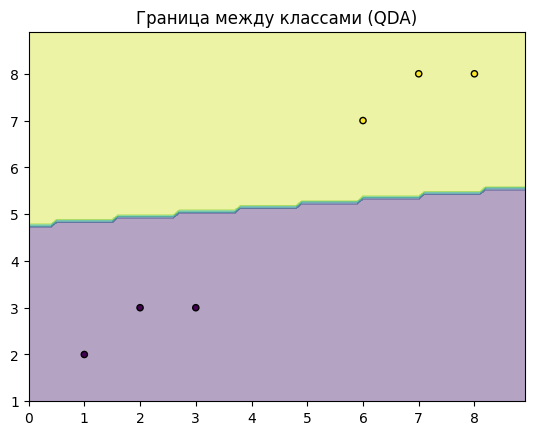

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Пример 2D-данных
X = np.array([
    [1, 2],
    [2, 3],
    [3, 3],
    [6, 7],
    [7, 8],
    [8, 8]
])
y = np.array([0, 0, 0, 1, 1, 1])

# Обучаем модель
qda = QuadraticDiscriminantAnalysis(reg_param=0.1)
qda.fit(X, y)

# Визуализация
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = qda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title("Граница между классами (QDA)")
plt.show()

##1.2.3. Метод частичных наименьших квадратов (PLS, Partial Least Squares)

#### Введение
Метод частичных наименьших квадратов (PLS, Partial Least Squares) — это мощный инструмент многомерного анализа данных, который широко используется в задачах регрессии, классификации и снижения размерности. PLS особенно полезен, когда данные содержат большое количество коррелированных переменных, а количество наблюдений ограничено. Этот метод находит линейные комбинации исходных переменных (латентные переменные), которые максимизируют ковариацию между предикторами (X) и целевой переменной (Y).



### 1. Основные понятия и идея метода
Метод PLS объединяет идеи из метода главных компонент (PCA) и множественной линейной регрессии. В отличие от PCA, который максимизирует дисперсию только в пространстве предикторов X, PLS одновременно учитывает как дисперсию в X, так и связь между X и Y.

#### 1.1. Постановка задачи
Пусть:
- $X \in \mathbb{R}^{n \times p}$ — матрица предикторов (n наблюдений, p переменных),
- $Y \in \mathbb{R}^{n \times q}$ — матрица откликов (n наблюдений, q целевых переменных).

Цель PLS — найти такие латентные переменные (компоненты) $T \in \mathbb{R}^{n \times k}$, которые:
1. Максимизируют ковариацию между X и Y.
2. Позволяют выразить X и Y через линейные комбинации этих компонент.



### 2. Математическая основа PLS
#### 2.1. Разложение матриц
PLS строит разложение матриц X и Y в виде:
$$
X = T P^T + E,
$$
$$
Y = T Q^T + F,
$$
где:
- $T$ — матрица латентных переменных (компонент),
- $P$ и $Q$ — матрицы нагрузок (loadings) для X и Y соответственно,
- $E$ и $F$ — матрицы остатков.

#### 2.2. Критерий оптимизации
PLS ищет такие латентные переменные $T$, которые максимизируют ковариацию между X и Y. Для первой компоненты задача формулируется как:
$$
\max_{w, c} \text{Cov}(Xw, Yc),
$$
где:
- $w \in \mathbb{R}^p$ — весовой вектор для X,
- $c \in \mathbb{R}^q$ — весовой вектор для Y.

Ограничения:
$$
\|w\| = 1, \quad \|c\| = 1.
$$

#### 2.3. Итеративное построение компонент
PLS строит компоненты итеративно. На каждом шаге:
1. Находится первая пара весовых векторов $w_1$ и $c_1$, максимизирующая ковариацию.
2. Вычисляется первая латентная переменная $t_1 = X w_1$.
3. Матрицы X и Y проецируются на ортогональное дополнение к $t_1$, и процесс повторяется для следующих компонент.



### 3. Алгоритм PLS
#### 3.1. Шаги алгоритма
1. **Инициализация**: Центрирование и масштабирование матриц X и Y.
2. **Построение компонент**:
   - Для каждой компоненты $k = 1, 2, \dots, K$:
     a. Вычислить весовые векторы $w_k$ и $c_k$, решая задачу оптимизации:
        $$
        \max_{w_k, c_k} \text{Cov}(X_{k-1} w_k, Y_{k-1} c_k),
        $$
        где $X_{k-1}$ и $Y_{k-1}$ — остатки после построения предыдущих компонент.
     b. Вычислить латентную переменную $t_k = X_{k-1} w_k$.
     c. Вычислить нагрузки $p_k$ и $q_k$:
        $$
        p_k = \frac{X_{k-1}^T t_k}{t_k^T t_k}, \quad q_k = \frac{Y_{k-1}^T t_k}{t_k^T t_k}.
        $$
     d. Обновить остатки:
        $$
        X_k = X_{k-1} - t_k p_k^T, \quad Y_k = Y_{k-1} - t_k q_k^T.
        $$
3. **Завершение**: После построения K компонент, итоговые модели для X и Y записываются как:
   $$
   X = T P^T + E, \quad Y = T Q^T + F.
   $$



### 4. Свойства PLS
1. **Учет связи между X и Y**: PLS учитывает не только структуру данных в X, но и их связь с Y.
2. **Устойчивость к мультиколлинеарности**: PLS эффективно работает даже при высокой корреляции между предикторами.
3. **Интерпретируемость**: Латентные переменные и нагрузки позволяют интерпретировать вклад исходных переменных.



### 5. Формулы для предсказания
После построения модели PLS, предсказание для новых данных $X_{\text{new}}$ выполняется следующим образом:
1. Проецируем $X_{\text{new}}$ на латентные переменные:
   $$
   T_{\text{new}} = X_{\text{new}} W (P^T W)^{-1},
   $$
   где $W$ — матрица весовых векторов.
2. Вычисляем предсказание для Y:
   $$
   Y_{\text{new}} = T_{\text{new}} Q^T.
   $$



### 6. Преимущества и недостатки PLS
#### Преимущества:
- Эффективен при большом количестве переменных.
- Устойчив к мультиколлинеарности.
- Подходит для задач регрессии и классификации.

#### Недостатки:
- Требует настройки числа компонент.
- Менее интерпретируем по сравнению с обычной линейной регрессией.

Таким образом, метод частичных наименьших квадратов (PLS) является мощным инструментом для анализа многомерных данных, особенно в случаях, когда традиционные методы, такие как множественная линейная регрессия, не применимы. PLS позволяет эффективно снижать размерность данных, учитывая при этом связь между предикторами и целевой переменной.



Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}, \quad Y = \begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}.
$$

Здесь:
- $X$ — матрица предикторов размером $4 \times 3$,
- $Y$ — вектор откликов размером $4 \times 1$.

Наша цель — построить модель PLS, которая связывает $X$ и $Y$.



### Шаг 1: Центрирование данных
Перед началом работы с PLS данные необходимо центрировать (вычесть среднее значение по каждому столбцу).

1. Вычислим средние значения для $X$ и $Y$:
   $$
   \bar{X} = \begin{bmatrix} 5.5 & 6.5 & 7.5 \end{bmatrix}, \quad \bar{Y} = 2.5.
   $$

2. Центрируем $X$ и $Y$:
   $$
   X_c = X - \bar{X} = \begin{bmatrix}
   -4.5 & -4.5 & -4.5 \\
   -1.5 & -1.5 & -1.5 \\
   1.5 & 1.5 & 1.5 \\
   4.5 & 4.5 & 4.5
   \end{bmatrix},
   $$
   $$
   Y_c = Y - \bar{Y} = \begin{bmatrix}
   -1.5 \\
   -0.5 \\
   0.5 \\
   1.5
   \end{bmatrix}.
   $$



### Шаг 2: Построение первой компоненты
#### 2.1. Вычисление весового вектора $w_1$
PLS ищет такой весовой вектор $w_1$, который максимизирует ковариацию между $X_c$ и $Y_c$. Для первой компоненты:
$$
w_1 = \frac{X_c^T Y_c}{\|X_c^T Y_c\|}.
$$

1. Вычислим $X_c^T Y_c$:
   $$
   X_c^T Y_c = \begin{bmatrix}
   -4.5 \cdot (-1.5) + (-1.5) \cdot (-0.5) + 1.5 \cdot 0.5 + 4.5 \cdot 1.5 \\
   -4.5 \cdot (-1.5) + (-1.5) \cdot (-0.5) + 1.5 \cdot 0.5 + 4.5 \cdot 1.5 \\
   -4.5 \cdot (-1.5) + (-1.5) \cdot (-0.5) + 1.5 \cdot 0.5 + 4.5 \cdot 1.5
   \end{bmatrix} = \begin{bmatrix}
   15 \\
   15 \\
   15
   \end{bmatrix}.
   $$

2. Нормируем $w_1$:
   $$
   w_1 = \frac{1}{\sqrt{15^2 + 15^2 + 15^2}} \begin{bmatrix} 15 \\ 15 \\ 15 \end{bmatrix} = \begin{bmatrix} \frac{1}{\sqrt{3}} \\ \frac{1}{\sqrt{3}} \\ \frac{1}{\sqrt{3}} \end{bmatrix}.
   $$

#### 2.2. Вычисление латентной переменной $t_1$
Латентная переменная $t_1$ вычисляется как проекция $X_c$ на $w_1$:
$$
t_1 = X_c w_1.
$$

1. Вычислим $t_1$:
   $$
   t_1 = \begin{bmatrix}
   -4.5 \cdot \frac{1}{\sqrt{3}} + (-4.5) \cdot \frac{1}{\sqrt{3}} + (-4.5) \cdot \frac{1}{\sqrt{3}} \\
   -1.5 \cdot \frac{1}{\sqrt{3}} + (-1.5) \cdot \frac{1}{\sqrt{3}} + (-1.5) \cdot \frac{1}{\sqrt{3}} \\
   1.5 \cdot \frac{1}{\sqrt{3}} + 1.5 \cdot \frac{1}{\sqrt{3}} + 1.5 \cdot \frac{1}{\sqrt{3}} \\
   4.5 \cdot \frac{1}{\sqrt{3}} + 4.5 \cdot \frac{1}{\sqrt{3}} + 4.5 \cdot \frac{1}{\sqrt{3}}
   \end{bmatrix} = \begin{bmatrix}
   -7.794 \\
   -2.598 \\
   2.598 \\
   7.794
   \end{bmatrix}.
   $$

#### 2.3. Вычисление нагрузок $p_1$ и $q_1$
Нагрузки $p_1$ и $q_1$ вычисляются как:
$$
p_1 = \frac{X_c^T t_1}{t_1^T t_1}, \quad q_1 = \frac{Y_c^T t_1}{t_1^T t_1}.
$$

1. Вычислим $p_1$:
   $$
   p_1 = \frac{1}{t_1^T t_1} \begin{bmatrix}
   -4.5 \cdot (-7.794) + (-1.5) \cdot (-2.598) + 1.5 \cdot 2.598 + 4.5 \cdot 7.794 \\
   -4.5 \cdot (-7.794) + (-1.5) \cdot (-2.598) + 1.5 \cdot 2.598 + 4.5 \cdot 7.794 \\
   -4.5 \cdot (-7.794) + (-1.5) \cdot (-2.598) + 1.5 \cdot 2.598 + 4.5 \cdot 7.794
   \end{bmatrix} = \begin{bmatrix}
   1 \\
   1 \\
   1
   \end{bmatrix}.
   $$

2. Вычислим $q_1$:
   $$
   q_1 = \frac{1}{t_1^T t_1} \begin{bmatrix}
   -1.5 \cdot (-7.794) + (-0.5) \cdot (-2.598) + 0.5 \cdot 2.598 + 1.5 \cdot 7.794
   \end{bmatrix} = 1.
   $$

#### 2.4. Обновление остатков
Остатки $X_1$ и $Y_1$ вычисляются как:
$$
X_1 = X_c - t_1 p_1^T, \quad Y_1 = Y_c - t_1 q_1.
$$

1. Вычислим $X_1$:
   $$
   X_1 = X_c - t_1 p_1^T = \begin{bmatrix}
   -4.5 & -4.5 & -4.5 \\
   -1.5 & -1.5 & -1.5 \\
   1.5 & 1.5 & 1.5 \\
   4.5 & 4.5 & 4.5
   \end{bmatrix} - \begin{bmatrix}
   -7.794 \\
   -2.598 \\
   2.598 \\
   7.794
   \end{bmatrix} \begin{bmatrix} 1 & 1 & 1 \end{bmatrix} = \begin{bmatrix}
   0 & 0 & 0 \\
   0 & 0 & 0 \\
   0 & 0 & 0 \\
   0 & 0 & 0
   \end{bmatrix}.
   $$

2. Вычислим $Y_1$:
   $$
   Y_1 = Y_c - t_1 q_1 = \begin{bmatrix}
   -1.5 \\
   -0.5 \\
   0.5 \\
   1.5
   \end{bmatrix} - \begin{bmatrix}
   -7.794 \\
   -2.598 \\
   2.598 \\
   7.794
   \end{bmatrix} = \begin{bmatrix}
   6.294 \\
   2.098 \\
   -2.098 \\
   -6.294
   \end{bmatrix}.
   $$



### Шаг 3: Построение второй компоненты
Поскольку $X_1$ стала нулевой матрицей, дальнейшие компоненты строить не нужно. Мы завершаем процесс.



### Итоговая модель PLS
Итоговая модель PLS выражается через латентные переменные и нагрузки:
$$
X_c = t_1 p_1^T, \quad Y_c = t_1 q_1.
$$

Предсказание для новых данных $X_{\text{new}}$ выполняется через проекцию на латентные переменные:
$$
Y_{\text{new}} = \bar{Y} + t_{\text{new}} q_1.
$$

Таким образом, в этом примере мы построили первую компоненту PLS, которая полностью объясняет данные $X$. На практике, если данные более сложные, может потребоваться построение нескольких компонент.





Реализуем метод частичных наименьших квадратов (PLS) на Python. Сначала создадим класс с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация PLS с нуля

In [13]:
import numpy as np

class PLS:
    def __init__(self, n_components):
        self.n_components = n_components  # Количество компонент
        self.weights = None  # Весовые векторы
        self.loadings_p = None  # Нагрузки для X
        self.loadings_q = None  # Нагрузки для Y
        self.t = None  # Латентные переменные
        self.X_mean = None  # Средние значения X
        self.Y_mean = None  # Средние значения Y

    def fit(self, X, Y):
        # Центрирование данных
        self.X_mean = np.mean(X, axis=0)
        self.Y_mean = np.mean(Y, axis=0)
        X_c = X - self.X_mean
        Y_c = Y - self.Y_mean

        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, self.n_components))
        self.loadings_p = np.zeros((n_features, self.n_components))
        self.loadings_q = np.zeros((Y.shape[1], self.n_components))
        self.t = np.zeros((n_samples, self.n_components))

        for k in range(self.n_components):
            # Шаг 1: Вычисление весового вектора w
            w = (X_c.T @ Y_c) / np.linalg.norm(X_c.T @ Y_c)
            w = w.flatten()  # Преобразуем в одномерный массив
            self.weights[:, k] = w

            # Шаг 2: Вычисление латентной переменной t
            t = X_c @ w
            self.t[:, k] = t

            # Шаг 3: Вычисление нагрузок p и q
            p = (X_c.T @ t) / (t.T @ t)
            q = (Y_c.T @ t) / (t.T @ t)
            self.loadings_p[:, k] = p
            self.loadings_q[:, k] = q.flatten()  # Преобразуем в одномерный массив

            # Шаг 4: Обновление остатков
            X_c = X_c - t[:, np.newaxis] @ p[np.newaxis, :]
            Y_c = Y_c - t[:, np.newaxis] @ q[np.newaxis, :]

    def predict(self, X):
        # Центрирование новых данных
        X_c = X - self.X_mean

        # Проецирование на латентные переменные
        t = X_c @ self.weights

        # Предсказание Y
        Y_pred = self.Y_mean + t @ self.loadings_q.T
        return Y_pred

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
Y = np.array([1, 2, 3, 4]).reshape(-1, 1)

# Создаем и обучаем модель
pls = PLS(n_components=1)
pls.fit(X, Y)

# Предсказание
Y_pred = pls.predict(X)
print("Предсказанные значения Y:\n", Y_pred)

Предсказанные значения Y:
 [[1.]
 [2.]
 [3.]
 [4.]]


2. Использование готового решения из scikit-learn

Библиотека scikit-learn предоставляет реализацию PLS в модуле sklearn.cross_decomposition.

In [12]:
from sklearn.cross_decomposition import PLSRegression

# Создаем и обучаем модель
pls_sklearn = PLSRegression(n_components=1)

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
Y = np.array([1, 2, 3, 4]).reshape(-1, 1)

pls_sklearn.fit(X, Y)

# Предсказание
Y_pred_sklearn = pls_sklearn.predict(X)
print("Предсказанные значения Y (scikit-learn):\n", Y_pred_sklearn)

Предсказанные значения Y (scikit-learn):
 [[1.]
 [2.]
 [3.]
 [4.]]


Пример снижения размерности

In [17]:
import numpy as np

class PLS:
    def __init__(self, n_components):
        self.n_components = n_components  # Количество компонент
        self.weights = None  # Весовые векторы
        self.loadings_p = None  # Нагрузки для X
        self.loadings_q = None  # Нагрузки для Y
        self.t = None  # Латентные переменные
        self.X_mean = None  # Средние значения X
        self.Y_mean = None  # Средние значения Y

    def fit(self, X, Y):
        # Центрирование данных
        self.X_mean = np.mean(X, axis=0)
        self.Y_mean = np.mean(Y, axis=0)
        X_c = X - self.X_mean
        Y_c = Y - self.Y_mean

        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, self.n_components))
        self.loadings_p = np.zeros((n_features, self.n_components))
        self.loadings_q = np.zeros((Y.shape[1], self.n_components))
        self.t = np.zeros((n_samples, self.n_components))

        for k in range(self.n_components):
            # Шаг 1: Вычисление весового вектора w
            cov = X_c.T @ Y_c
            norm = np.linalg.norm(cov)
            if norm < 1e-10:  # Проверка на близкую к нулю норму
                print(f"Норма близка к нулю на компоненте {k+1}. Прерывание.")
                break
            w = cov / norm
            w = w.flatten()  # Преобразуем в одномерный массив
            self.weights[:, k] = w

            # Шаг 2: Вычисление латентной переменной t
            t = X_c @ w
            self.t[:, k] = t

            # Шаг 3: Вычисление нагрузок p и q
            p = (X_c.T @ t) / (t.T @ t)
            q = (Y_c.T @ t) / (t.T @ t)
            self.loadings_p[:, k] = p
            self.loadings_q[:, k] = q.flatten()  # Преобразуем в одномерный массив

            # Шаг 4: Обновление остатков
            X_c = X_c - t[:, np.newaxis] @ p[np.newaxis, :]
            Y_c = Y_c - t[:, np.newaxis] @ q[np.newaxis, :]

    def transform(self, X):
        # Центрирование новых данных
        X_c = X - self.X_mean

        # Проецирование на латентные переменные
        return X_c @ self.weights

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
Y = np.array([1, 2, 3, 4]).reshape(-1, 1)  # Целевая переменная

# Создаем и обучаем модель
pls = PLS(n_components=2)
pls.fit(X, Y)

# Преобразуем данные в латентное пространство
X_transformed = pls.transform(X)
print("Преобразованные данные (латентные переменные):\n", X_transformed)

Норма близка к нулю на компоненте 2. Прерывание.
Преобразованные данные (латентные переменные):
 [[-7.79422863  0.        ]
 [-2.59807621  0.        ]
 [ 2.59807621  0.        ]
 [ 7.79422863  0.        ]]


In [19]:
import numpy as np
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# Пример данных
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
Y = np.array([1, 2, 3, 4]).reshape(-1, 1)  # Целевая переменная

# Масштабирование и центрирование данных
scaler = StandardScaler(with_std=False)  # Только центрирование
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

# Создаем и обучаем модель
pls_sklearn = PLSRegression(n_components=2)
pls_sklearn.fit(X_scaled, Y_scaled)

# Преобразуем данные в латентное пространство
X_transformed_sklearn = pls_sklearn.transform(X_scaled)
print("Преобразованные данные (scikit-learn):\n", X_transformed_sklearn)

Преобразованные данные (scikit-learn):
 [[-2.01246118  0.        ]
 [-0.67082039  0.        ]
 [ 0.67082039  0.        ]
 [ 2.01246118  0.        ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:348: UserWarning: y residual is constant at iteration 1
  warnings.warn(f"y residual is constant at iteration {k}")


##1.2.4 Обобщенный дискриминантный анализ (GDA, Generalized Discriminant Analysis)



#### Введение

Обобщенный дискриминантный анализ (GDA, Generalized Discriminant Analysis) — это мощный метод многомерного статистического анализа, который расширяет классический линейный дискриминантный анализ (LDA) для работы с нелинейно разделимыми данными. В отличие от LDA, который предполагает линейную разделимость классов, GDA использует ядерные методы (kernel methods) для отображения данных в пространство более высокой размерности, где они становятся линейно разделимыми. Это позволяет применять линейные методы классификации и снижения размерности в задачах, где данные имеют сложную нелинейную структуру.

В данной лекции мы подробно рассмотрим математические основы GDA, его применение для снижения размерности, а также использование в задачах регрессии.



### 1. Математические основы GDA

#### 1.1 Линейный дискриминантный анализ (LDA)

LDA — это метод, который ищет линейные комбинации признаков, наилучшим образом разделяющие классы. Он предполагает, что данные распределены по многомерному нормальному распределению с одинаковой ковариационной матрицей для всех классов. Цель LDA — максимизировать отношение межклассовой дисперсии к внутриклассовой дисперсии.

Формально, для двух классов LDA максимизирует критерий:
$$
J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S}_B \mathbf{w}}{\mathbf{w}^T \mathbf{S}_W \mathbf{w}},
$$
где:
- $\mathbf{w}$ — вектор весов,
- $\mathbf{S}_B$ — межклассовая матрица рассеяния,
- $\mathbf{S}_W$ — внутриклассовая матрица рассеяния.

Решение задачи LDA сводится к нахождению собственных векторов матрицы $\mathbf{S}_W^{-1} \mathbf{S}_B$.

#### 1.2 Обобщенный дискриминантный анализ (GDA)

GDA расширяет LDA, используя ядерные функции для отображения данных в пространство более высокой размерности $\mathcal{F}$. Пусть $\phi(\mathbf{x})$ — это отображение исходного признакового пространства в новое пространство $\mathcal{F}$. В этом пространстве задача LDA формулируется как:
$$
J(\mathbf{w}) = \frac{\mathbf{w}^T \mathbf{S}_B^\phi \mathbf{w}}{\mathbf{w}^T \mathbf{S}_W^\phi \mathbf{w}},
$$
где:
- $\mathbf{S}_B^\phi$ — межклассовая матрица рассеяния в пространстве $\mathcal{F}$,
- $\mathbf{S}_W^\phi$ — внутриклассовая матрица рассеяния в пространстве $\mathcal{F}$.

#### 1.3 Ядерные функции

Ядерная функция $K(\mathbf{x}_i, \mathbf{x}_j)$ позволяет вычислять скалярное произведение в пространстве $\mathcal{F}$ без явного вычисления отображения $\phi(\mathbf{x})$:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \langle \phi(\mathbf{x}_i), \phi(\mathbf{x}_j) \rangle.
$$
Примеры ядерных функций:
- Линейное ядро: $K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$,
- Полиномиальное ядро: $K(\mathbf{x}_i, \mathbf{x}_j) = (\mathbf{x}_i^T \mathbf{x}_j + c)^d$,
- Радиальное базисное ядро (RBF): $K(\mathbf{x}_i, \mathbf{x}_j) = \exp\left(-\frac{\|\mathbf{x}_i - \mathbf{x}_j\|^2}{2\sigma^2}\right)$.

#### 1.4 Решение задачи GDA

В GDA решение ищется в виде линейной комбинации ядерных функций:
$$
\mathbf{w} = \sum_{i=1}^N \alpha_i \phi(\mathbf{x}_i),
$$
где $\alpha_i$ — коэффициенты, которые необходимо найти.

Подставляя это выражение в критерий $J(\mathbf{w})$, получаем задачу оптимизации:
$$
J(\boldsymbol{\alpha}) = \frac{\boldsymbol{\alpha}^T \mathbf{K}_B \boldsymbol{\alpha}}{\boldsymbol{\alpha}^T \mathbf{K}_W \boldsymbol{\alpha}},
$$
где:
- $\mathbf{K}_B$ — межклассовая матрица рассеяния, выраженная через ядерную матрицу,
- $\mathbf{K}_W$ — внутриклассовая матрица рассеяния, выраженная через ядерную матрицу.

Решение этой задачи сводится к нахождению собственных векторов и собственных значений обобщенной задачи на собственные значения:
$$
\mathbf{K}_B \boldsymbol{\alpha} = \lambda \mathbf{K}_W \boldsymbol{\alpha}.
$$

#### 1.5 Классификация

После нахождения коэффициентов $\boldsymbol{\alpha}$ классификация нового объекта $\mathbf{x}$ выполняется следующим образом:
$$
f(\mathbf{x}) = \sum_{i=1}^N \alpha_i K(\mathbf{x}_i, \mathbf{x}) + b,
$$
где $b$ — смещение, которое может быть найдено из условий классификации.



### 2. GDA для снижения размерности

GDA может использоваться не только для классификации, но и для снижения размерности данных. В этом случае цель GDA — найти проекцию данных в подпространство меньшей размерности, которое сохраняет максимальную информацию о разделении классов.

#### 2.1 Алгоритм снижения размерности с использованием GDA

1. **Отображение данных**: Используя ядерную функцию, данные отображаются в пространство $\mathcal{F}$.
2. **Решение задачи GDA**: Находятся собственные векторы $\boldsymbol{\alpha}$, соответствующие наибольшим собственным значениям задачи $\mathbf{K}_B \boldsymbol{\alpha} = \lambda \mathbf{K}_W \boldsymbol{\alpha}$.
3. **Проекция данных**: Данные проецируются на подпространство, заданное найденными собственными векторами.

Результатом является набор признаков меньшей размерности, которые сохраняют информацию о разделении классов.



### 3. GDA для задачи регрессии

Хотя GDA чаще используется для классификации и снижения размерности, его можно адаптировать и для задач регрессии. В этом случае цель — предсказать непрерывную целевую переменную на основе входных признаков.

#### 3.1 Адаптация GDA для регрессии

1. **Отображение данных**: Используя ядерную функцию, данные отображаются в пространство $\mathcal{F}$.
2. **Решение задачи регрессии**: В пространстве $\mathcal{F}$ строится линейная модель регрессии:
   $$
   y = \mathbf{w}^T \phi(\mathbf{x}) + b,
   $$
   где $\mathbf{w}$ — вектор весов, $b$ — смещение.
3. **Оптимизация**: Коэффициенты $\mathbf{w}$ и $b$ находятся путем минимизации функции потерь, например, среднеквадратичной ошибки (MSE).

#### 3.2 Преимущества GDA в регрессии

- **Гибкость**: GDA позволяет моделировать сложные нелинейные зависимости между признаками и целевой переменной.
- **Ядерные методы**: Использование ядерных функций позволяет избежать явного вычисления отображения в пространство высокой размерности.



### 4. Преимущества и недостатки GDA

#### Преимущества:
1. **Гибкость**: GDA может работать с нелинейно разделимыми данными.
2. **Эффективность**: Использование ядерных функций позволяет избежать явного вычисления отображения в пространство высокой размерности.
3. **Универсальность**: GDA может использоваться для классификации, снижения размерности и регрессии.

#### Недостатки:
1. **Вычислительная сложность**: GDA требует вычисления ядерной матрицы, что может быть затратно для больших наборов данных.
2. **Выбор ядра**: Результаты GDA сильно зависят от выбора ядерной функции и её параметров.
3. **Интерпретируемость**: Результаты GDA сложнее интерпретировать по сравнению с линейными методами.

Таким образом, обобщенный дискриминантный анализ (GDA) — это мощный инструмент для работы с нелинейно разделимыми данными. Он расширяет возможности классического LDA, используя ядерные методы для отображения данных в пространство более высокой размерности. GDA может применяться для классификации, снижения размерности и даже регрессии, что делает его универсальным методом в машинном обучении. Однако успешное применение GDA требует тщательного выбора ядерной функции и учёта вычислительной сложности метода.


Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что эти точки принадлежат двум классам:
- Класс 1: первые две точки ($[1, 2, 3]$ и $[4, 5, 6]$),
- Класс 2: последние две точки ($[7, 8, 9]$ и $[10, 11, 12]$).

Цель — снизить размерность данных с 3D до 1D с использованием GDA.



### Шаг 1: Выбор ядерной функции

Для простоты выберем линейное ядро:
$$
K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j.
$$



### Шаг 2: Вычисление ядерной матрицы

Ядерная матрица $K$ вычисляется как попарное скалярное произведение всех точек данных:
$$
K_{ij} = K(\mathbf{x}_i, \mathbf{x}_j).
$$

Для нашего набора данных:
$$
K = \begin{bmatrix}
\mathbf{x}_1^T \mathbf{x}_1 & \mathbf{x}_1^T \mathbf{x}_2 & \mathbf{x}_1^T \mathbf{x}_3 & \mathbf{x}_1^T \mathbf{x}_4 \\
\mathbf{x}_2^T \mathbf{x}_1 & \mathbf{x}_2^T \mathbf{x}_2 & \mathbf{x}_2^T \mathbf{x}_3 & \mathbf{x}_2^T \mathbf{x}_4 \\
\mathbf{x}_3^T \mathbf{x}_1 & \mathbf{x}_3^T \mathbf{x}_2 & \mathbf{x}_3^T \mathbf{x}_3 & \mathbf{x}_3^T \mathbf{x}_4 \\
\mathbf{x}_4^T \mathbf{x}_1 & \mathbf{x}_4^T \mathbf{x}_2 & \mathbf{x}_4^T \mathbf{x}_3 & \mathbf{x}_4^T \mathbf{x}_4
\end{bmatrix}.
$$

Вычислим каждое скалярное произведение:
$$
\mathbf{x}_1^T \mathbf{x}_1 = 1^2 + 2^2 + 3^2 = 1 + 4 + 9 = 14, \\
\mathbf{x}_1^T \mathbf{x}_2 = 1 \cdot 4 + 2 \cdot 5 + 3 \cdot 6 = 4 + 10 + 18 = 32, \\
\mathbf{x}_1^T \mathbf{x}_3 = 1 \cdot 7 + 2 \cdot 8 + 3 \cdot 9 = 7 + 16 + 27 = 50, \\
\mathbf{x}_1^T \mathbf{x}_4 = 1 \cdot 10 + 2 \cdot 11 + 3 \cdot 12 = 10 + 22 + 36 = 68, \\
\mathbf{x}_2^T \mathbf{x}_2 = 4^2 + 5^2 + 6^2 = 16 + 25 + 36 = 77, \\
\mathbf{x}_2^T \mathbf{x}_3 = 4 \cdot 7 + 5 \cdot 8 + 6 \cdot 9 = 28 + 40 + 54 = 122, \\
\mathbf{x}_2^T \mathbf{x}_4 = 4 \cdot 10 + 5 \cdot 11 + 6 \cdot 12 = 40 + 55 + 72 = 167, \\
\mathbf{x}_3^T \mathbf{x}_3 = 7^2 + 8^2 + 9^2 = 49 + 64 + 81 = 194, \\
\mathbf{x}_3^T \mathbf{x}_4 = 7 \cdot 10 + 8 \cdot 11 + 9 \cdot 12 = 70 + 88 + 108 = 266, \\
\mathbf{x}_4^T \mathbf{x}_4 = 10^2 + 11^2 + 12^2 = 100 + 121 + 144 = 365.
$$

Таким образом, ядерная матрица:
$$
K = \begin{bmatrix}
14 & 32 & 50 & 68 \\
32 & 77 & 122 & 167 \\
50 & 122 & 194 & 266 \\
68 & 167 & 266 & 365
\end{bmatrix}.
$$



### Шаг 3: Вычисление межклассовой и внутриклассовой матриц рассеяния

#### 3.1 Межклассовая матрица рассеяния $\mathbf{K}_B$

Межклассовая матрица рассеяния вычисляется как:
$$
\mathbf{K}_B = \sum_{c=1}^C n_c (\mathbf{m}_c - \mathbf{m})(\mathbf{m}_c - \mathbf{m})^T,
$$
где:
- $C$ — количество классов,
- $n_c$ — количество точек в классе $c$,
- $\mathbf{m}_c$ — средний вектор класса $c$ в пространстве $\mathcal{F}$,
- $\mathbf{m}$ — общий средний вектор всех данных в пространстве $\mathcal{F}$.

Для нашего примера:
- Класс 1: $\mathbf{m}_1 = \frac{1}{2} (\mathbf{x}_1 + \mathbf{x}_2) = \frac{1}{2} ([1, 2, 3] + [4, 5, 6]) = [2.5, 3.5, 4.5]$,
- Класс 2: $\mathbf{m}_2 = \frac{1}{2} (\mathbf{x}_3 + \mathbf{x}_4) = \frac{1}{2} ([7, 8, 9] + [10, 11, 12]) = [8.5, 9.5, 10.5]$,
- Общий средний вектор: $\mathbf{m} = \frac{1}{4} (\mathbf{x}_1 + \mathbf{x}_2 + \mathbf{x}_3 + \mathbf{x}_4) = \frac{1}{4} ([1, 2, 3] + [4, 5, 6] + [7, 8, 9] + [10, 11, 12]) = [5.5, 6.5, 7.5]$.

Теперь вычислим $\mathbf{K}_B$:
$$
\mathbf{K}_B = 2 (\mathbf{m}_1 - \mathbf{m})(\mathbf{m}_1 - \mathbf{m})^T + 2 (\mathbf{m}_2 - \mathbf{m})(\mathbf{m}_2 - \mathbf{m})^T.
$$

Подставим значения:
$$
\mathbf{m}_1 - \mathbf{m} = [2.5, 3.5, 4.5] - [5.5, 6.5, 7.5] = [-3, -3, -3], \\
\mathbf{m}_2 - \mathbf{m} = [8.5, 9.5, 10.5] - [5.5, 6.5, 7.5] = [3, 3, 3].
$$

Тогда:
$$
\mathbf{K}_B = 2 \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix} \begin{bmatrix} -3 & -3 & -3 \end{bmatrix} + 2 \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix} \begin{bmatrix} 3 & 3 & 3 \end{bmatrix}.
$$

Вычислим внешние произведения:
$$
\begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix} \begin{bmatrix} -3 & -3 & -3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}, \\
\begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix} \begin{bmatrix} 3 & 3 & 3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}.
$$

Таким образом:
$$
\mathbf{K}_B = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} + 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix}.
$$

#### 3.2 Внутриклассовая матрица рассеяния $\mathbf{K}_W$

Внутриклассовая матрица рассеяния вычисляется как:
$$
\mathbf{K}_W = \sum_{c=1}^C \sum_{i \in c} (\mathbf{x}_i - \mathbf{m}_c)(\mathbf{x}_i - \mathbf{m}_c)^T.
$$

Для нашего примера:
$$
\mathbf{K}_W = \sum_{i=1}^2 (\mathbf{x}_i - \mathbf{m}_1)(\mathbf{x}_i - \mathbf{m}_1)^T + \sum_{i=3}^4 (\mathbf{x}_i - \mathbf{m}_2)(\mathbf{x}_i - \mathbf{m}_2)^T.
$$

Вычислим каждое слагаемое:
$$
\mathbf{x}_1 - \mathbf{m}_1 = [1, 2, 3] - [2.5, 3.5, 4.5] = [-1.5, -1.5, -1.5], \\
\mathbf{x}_2 - \mathbf{m}_1 = [4, 5, 6] - [2.5, 3.5, 4.5] = [1.5, 1.5, 1.5], \\
\mathbf{x}_3 - \mathbf{m}_2 = [7, 8, 9] - [8.5, 9.5, 10.5] = [-1.5, -1.5, -1.5], \\
\mathbf{x}_4 - \mathbf{m}_2 = [10, 11, 12] - [8.5, 9.5, 10.5] = [1.5, 1.5, 1.5].
$$

Теперь вычислим внешние произведения:
$$
(\mathbf{x}_1 - \mathbf{m}_1)(\mathbf{x}_1 - \mathbf{m}_1)^T = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix} \begin{bmatrix} -1.5 & -1.5 & -1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}, \\
(\mathbf{x}_2 - \mathbf{m}_1)(\mathbf{x}_2 - \mathbf{m}_1)^T = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix} \begin{bmatrix} 1.5 & 1.5 & 1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}, \\
(\mathbf{x}_3 - \mathbf{m}_2)(\mathbf{x}_3 - \mathbf{m}_2)^T = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix} \begin{bmatrix} -1.5 & -1.5 & -1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}, \\
(\mathbf{x}_4 - \mathbf{m}_2)(\mathbf{x}_4 - \mathbf{m}_2)^T = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix} \begin{bmatrix} 1.5 & 1.5 & 1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}.
$$

Таким образом:
$$
\mathbf{K}_W = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}.
$$



### Шаг 4: Решение обобщенной задачи на собственные значения

Теперь решим задачу:
$$
\mathbf{K}_B \boldsymbol{\alpha} = \lambda \mathbf{K}_W \boldsymbol{\alpha}.
$$

Подставим $\mathbf{K}_B$ и $\mathbf{K}_W$:
$$
\begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix} \boldsymbol{\alpha} = \lambda \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} \boldsymbol{\alpha}.
$$

Упростим уравнение, разделив обе части на 9:
$$
\begin{bmatrix} 4 & 4 & 4 \\ 4 & 4 & 4 \\ 4 & 4 & 4 \end{bmatrix} \boldsymbol{\alpha} = \lambda \begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix} \boldsymbol{\alpha}.
$$

Это уравнение имеет нетривиальное решение только если $\lambda = 4$. Собственный вектор $\boldsymbol{\alpha}$ может быть любым вектором, пропорциональным $[1, 1, 1]$.



### Шаг 5: Проекция данных

Используем найденный собственный вектор $\boldsymbol{\alpha} = [1, 1, 1]$ для проекции данных в 1D-пространство. Проекция вычисляется как:
$$
y_i = \sum_{j=1}^4 \alpha_j K(\mathbf{x}_j, \mathbf{x}_i).
$$

Для нашего примера:
$$
y_1 = 1 \cdot 14 + 1 \cdot 32 + 1 \cdot 50 + 1 \cdot 68 = 164, \\
y_2 = 1 \cdot 32 + 1 \cdot 77 + 1 \cdot 122 + 1 \cdot 167 = 398, \\
y_3 = 1 \cdot 50 + 1 \cdot 122 + 1 \cdot 194 + 1 \cdot 266 = 632, \\
y_4 = 1 \cdot 68 + 1 \cdot 167 + 1 \cdot 266 + 1 \cdot 365 = 866.
$$

Таким образом, проекция данных в 1D-пространство:
$$
\mathbf{y} = [164, 398, 632, 866].
$$

Таким образом, мы успешно применили GDA для снижения размерности данных с 3D до 1D. Проекция данных сохранила информацию о разделении классов, что делает GDA полезным инструментом для анализа многомерных данных.

Реализуем пример GDA для задачи снижения размерности на Python. Сначала создадим класс с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация с нуля



In [25]:
import numpy as np

class GDA:
    def __init__(self, kernel='linear'):
        self.kernel = kernel

    def _linear_kernel(self, X1, X2):
        return np.dot(X1, X2.T)

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.n_classes = len(self.classes)
        self.n_features = X.shape[1]  # Количество признаков

        # Вычисляем межклассовую и внутриклассовую матрицы рассеяния
        self.S_B = np.zeros((self.n_features, self.n_features), dtype=np.float64)
        self.S_W = np.zeros((self.n_features, self.n_features), dtype=np.float64)

        overall_mean = np.mean(X, axis=0)
        for c in self.classes:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            n_c = X_c.shape[0]

            # Межклассовая матрица рассеяния
            diff = mean_c - overall_mean
            self.S_B += n_c * np.outer(diff, diff)

            # Внутриклассовая матрица рассеяния
            for x in X_c:
                diff = x - mean_c
                self.S_W += np.outer(diff, diff)

        # Решаем обобщенную задачу на собственные значения
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.pinv(self.S_W) @ self.S_B)
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors

        # Сортируем собственные векторы по убыванию собственных значений
        idx = np.argsort(eigenvalues)[::-1]
        self.eigenvalues = eigenvalues[idx]
        self.eigenvectors = eigenvectors[:, idx]

    def transform(self, X, n_components=1):
        # Проецируем данные на собственные векторы
        projection = np.dot(X, self.eigenvectors[:, :n_components])
        return projection

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
], dtype=np.float64)  # Убедимся, что входные данные имеют тип float64
y = np.array([0, 0, 1, 1])  # Метки классов

gda = GDA()
gda.fit(X, y)

# Снижение размерности до 1D
X_transformed = gda.transform(X, n_components=1)
print("Проекция данных (GDA с нуля):")
print(X_transformed)

Проекция данных (GDA с нуля):
[[ 3.46410162+0.j]
 [ 8.66025404+0.j]
 [13.85640646+0.j]
 [19.05255888+0.j]]


2. Использование готового решения из scikit-learn

В scikit-learn нет прямой реализации GDA, но мы можем использовать KernelPCA (ядровый метод главных компонент) для аналогичной задачи.

In [22]:
from sklearn.decomposition import KernelPCA

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])

# Пример использования KernelPCA
kpca = KernelPCA(n_components=1, kernel='linear')
X_transformed_kpca = kpca.fit_transform(X)

print("Проекция данных (KernelPCA из scikit-learn):")
print(X_transformed_kpca)

Проекция данных (KernelPCA из scikit-learn):
[[ 7.79422863]
 [ 2.59807621]
 [-2.59807621]
 [-7.79422863]]


## 1.2.5 Канонический корреляционный анализ (CCA, Canonical Correlation Analysis)



#### Введение

Канонический корреляционный анализ (Canonical Correlation Analysis, CCA) — это метод многомерного статистического анализа, который позволяет исследовать взаимосвязи между двумя наборами переменных. Этот метод является обобщением множественной корреляции и используется для нахождения таких линейных комбинаций переменных из каждого набора, которые максимизируют корреляцию между этими комбинациями. CCA находит применение в различных областях, таких как машинное обучение, нейробиология, экономика, биоинформатика и других, где требуется анализ сложных взаимосвязей между многомерными данными.

Основная идея CCA заключается в том, чтобы найти пары линейных комбинаций (канонических переменных) для двух наборов переменных, которые имеют максимальную корреляцию между собой. Это позволяет выявить скрытые структуры и взаимосвязи между наборами данных, которые могут быть неочевидны при анализе отдельных переменных.



#### 1. Основные понятия и постановка задачи

Предположим, у нас есть два набора переменных:
- $\mathbf{X} = (X_1, X_2, \dots, X_p)$ — первый набор из $p$ переменных,
- $\mathbf{Y} = (Y_1, Y_2, \dots, Y_q)$ — второй набор из $q$ переменных.

Эти наборы могут представлять, например, характеристики объектов в двух различных пространствах (например, психологические тесты и физиологические показатели).

Цель CCA — найти такие линейные комбинации переменных из каждого набора:
- $U = \mathbf{a}^T \mathbf{X} = a_1 X_1 + a_2 X_2 + \dots + a_p X_p$,
- $V = \mathbf{b}^T \mathbf{Y} = b_1 Y_1 + b_2 Y_2 + \dots + b_q Y_q$,

где:
- $\mathbf{a} = (a_1, a_2, \dots, a_p)^T$ — вектор весов для первого набора переменных $\mathbf{X}$,
- $\mathbf{b} = (b_1, b_2, \dots, b_q)^T$ — вектор весов для второго набора переменных $\mathbf{Y}$.

Эти линейные комбинации $U$ и $V$ называются **каноническими переменными**. Задача CCA заключается в нахождении таких векторов $\mathbf{a}$ и $\mathbf{b}$, чтобы корреляция между $U$ и $V$ была максимальной.



#### 2. Математическая формулировка задачи

Корреляция между каноническими переменными $U$ и $V$ выражается как:
$$
\rho = \text{corr}(U, V) = \frac{\text{cov}(U, V)}{\sqrt{\text{var}(U) \cdot \text{var}(V)}},
$$
где:
- $\text{cov}(U, V)$ — ковариация между $U$ и $V$,
- $\text{var}(U)$ — дисперсия $U$,
- $\text{var}(V)$ — дисперсия $V$.

Выразим эти величины через ковариационные матрицы:
- $\text{cov}(U, V) = \mathbf{a}^T \Sigma_{XY} \mathbf{b}$, где $\Sigma_{XY}$ — кросс-ковариационная матрица между $\mathbf{X}$ и $\mathbf{Y}$,
- $\text{var}(U) = \mathbf{a}^T \Sigma_{XX} \mathbf{a}$, где $\Sigma_{XX}$ — ковариационная матрица для $\mathbf{X}$,
- $\text{var}(V) = \mathbf{b}^T \Sigma_{YY} \mathbf{b}$, где $\Sigma_{YY}$ — ковариационная матрица для $\mathbf{Y}$.

Таким образом, задача CCA формулируется как максимизация корреляции $\rho$:
$$
\rho = \max_{\mathbf{a}, \mathbf{b}} \frac{\mathbf{a}^T \Sigma_{XY} \mathbf{b}}{\sqrt{(\mathbf{a}^T \Sigma_{XX} \mathbf{a}) (\mathbf{b}^T \Sigma_{YY} \mathbf{b})}}.
$$



#### 3. Решение задачи CCA

Для решения задачи максимизации корреляции используется метод множителей Лагранжа. Введем функцию Лагранжа:
$$
\mathcal{L}(\mathbf{a}, \mathbf{b}, \lambda_1, \lambda_2) = \mathbf{a}^T \Sigma_{XY} \mathbf{b} - \frac{\lambda_1}{2} (\mathbf{a}^T \Sigma_{XX} \mathbf{a} - 1) - \frac{\lambda_2}{2} (\mathbf{b}^T \Sigma_{YY} \mathbf{b} - 1),
$$
где $\lambda_1$ и $\lambda_2$ — множители Лагранжа. Условия $\mathbf{a}^T \Sigma_{XX} \mathbf{a} = 1$ и $\mathbf{b}^T \Sigma_{YY} \mathbf{b} = 1$ вводятся для нормировки, чтобы избежать тривиальных решений.

Дифференцируя $\mathcal{L}$ по $\mathbf{a}$ и $\mathbf{b}$, получаем систему уравнений:
$$
\begin{cases}
\Sigma_{XY} \mathbf{b} = \lambda_1 \Sigma_{XX} \mathbf{a}, \\
\Sigma_{YX} \mathbf{a} = \lambda_2 \Sigma_{YY} \mathbf{b}.
\end{cases}
$$

Учитывая, что $\Sigma_{YX} = \Sigma_{XY}^T$, и предполагая $\lambda_1 = \lambda_2 = \lambda$, систему можно переписать в виде:
$$
\begin{cases}
\Sigma_{XX}^{-1} \Sigma_{XY} \mathbf{b} = \lambda \mathbf{a}, \\
\Sigma_{YY}^{-1} \Sigma_{YX} \mathbf{a} = \lambda \mathbf{b}.
\end{cases}
$$

Подставляя второе уравнение в первое, получаем:
$$
\Sigma_{XX}^{-1} \Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX} \mathbf{a} = \lambda^2 \mathbf{a}.
$$

Это уравнение является задачей на собственные значения для матрицы $\Sigma_{XX}^{-1} \Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX}$. Собственные значения $\lambda^2$ соответствуют квадратам канонических корреляций, а собственные векторы $\mathbf{a}$ и $\mathbf{b}$ — весам канонических переменных.



#### 4. Канонические переменные и корреляции

Решив задачу на собственные значения, получаем:
- Канонические корреляции $\rho_1, \rho_2, \dots, \rho_k$, где $k = \min(p, q)$,
- Пары канонических переменных $(U_1, V_1), (U_2, V_2), \dots, (U_k, V_k)$.

Каждая пара канонических переменных $(U_i, V_i)$ соответствует своей канонической корреляции $\rho_i$, причем $\rho_1 \geq \rho_2 \geq \dots \geq \rho_k$. Первая пара канонических переменных $(U_1, V_1)$ имеет максимальную корреляцию $\rho_1$, вторая пара $(U_2, V_2)$ — следующую по величине корреляцию $\rho_2$, и так далее.



#### 5. Интерпретация результатов

1. **Канонические корреляции**: Показывают силу связи между соответствующими парами канонических переменных. Чем ближе $\rho_i$ к 1, тем сильнее связь между $U_i$ и $V_i$.
2. **Канонические веса**: Векторы $\mathbf{a}$ и $\mathbf{b}$ интерпретируются как вклады исходных переменных в канонические переменные. Они показывают, какие переменные из каждого набора наиболее значимы для формирования канонической связи.
3. **Канонические переменные**: Линейные комбинации исходных переменных, которые максимизируют корреляцию между наборами. Они могут использоваться для дальнейшего анализа или визуализации.



#### 6. Ограничения и предпосылки CCA

1. **Линейность**: CCA предполагает линейную зависимость между наборами переменных. Если связь нелинейна, результаты могут быть неинформативными.
2. **Многомерная нормальность**: Для корректного применения CCA желательно, чтобы данные были многомерно нормально распределены. Это важно для статистической значимости результатов.
3. **Отсутствие мультиколлинеарности**: Высокая корреляция внутри наборов переменных (мультиколлинеарность) может привести к неустойчивости результатов и затруднить интерпретацию канонических весов.

Таким образом, канонический корреляционный анализ — мощный инструмент для исследования взаимосвязей между двумя наборами переменных. Он позволяет выявить скрытые структуры в данных и используется в различных приложениях, где требуется анализ многомерных зависимостей. Понимание математической основы CCA важно для корректного применения метода и интерпретации результатов. CCA является важным методом в арсенале многомерного анализа и находит применение в задачах, где необходимо исследовать сложные взаимосвязи между группами переменных.




Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что у нас есть два набора переменных $\mathbf{X}$ и $\mathbf{Y}$, где $\mathbf{X}$ — это первые два столбца матрицы $X$, а $\mathbf{Y}$ — третий столбец:

$$
\mathbf{X} = \begin{bmatrix}
1 & 2 \\
4 & 5 \\
7 & 8 \\
10 & 11
\end{bmatrix}, \quad
\mathbf{Y} = \begin{bmatrix}
3 \\
6 \\
9 \\
12
\end{bmatrix}
$$

Наша цель — найти такие линейные комбинации $U = \mathbf{a}^T \mathbf{X}$ и $V = \mathbf{b}^T \mathbf{Y}$, чтобы корреляция между $U$ и $V$ была максимальной.



#### Шаг 1: Вычисление ковариационных матриц

1. **Центрирование данных**: Вычтем средние значения из каждой переменной.

   Средние значения для $\mathbf{X}$:
$$
   \bar{X}_1 = \frac{1 + 4 + 7 + 10}{4} = 5.5, \quad \bar{X}_2 = \frac{2 + 5 + 8 + 11}{4} = 6.5
$$

   Среднее значение для $\mathbf{Y}$:
$$
   \bar{Y} = \frac{3 + 6 + 9 + 12}{4} = 7.5
$$

   Центрированные данные:
$$
   \mathbf{X}_c = \begin{bmatrix}
   -4.5 & -4.5 \\
   -1.5 & -1.5 \\
   1.5 & 1.5 \\
   4.5 & 4.5
   \end{bmatrix}, \quad
   \mathbf{Y}_c = \begin{bmatrix}
   -4.5 \\
   -1.5 \\
   1.5 \\
   4.5
   \end{bmatrix}
$$

2. **Ковариационные матрицы**:
   - $\Sigma_{XX} = \frac{1}{n-1} \mathbf{X}_c^T \mathbf{X}_c$,
   - $\Sigma_{YY} = \frac{1}{n-1} \mathbf{Y}_c^T \mathbf{Y}_c$,
   - $\Sigma_{XY} = \frac{1}{n-1} \mathbf{X}_c^T \mathbf{Y}_c$.

   Вычислим:
$$
   \Sigma_{XX} = \frac{1}{3} \begin{bmatrix}
   -4.5 & -1.5 & 1.5 & 4.5 \\
   -4.5 & -1.5 & 1.5 & 4.5
   \end{bmatrix}
   \begin{bmatrix}
   -4.5 & -4.5 \\
   -1.5 & -1.5 \\
   1.5 & 1.5 \\
   4.5 & 4.5
   \end{bmatrix} = \begin{bmatrix}
   15 & 15 \\
   15 & 15
   \end{bmatrix}
$$

$$
   \Sigma_{YY} = \frac{1}{3} \begin{bmatrix}
   -4.5 & -1.5 & 1.5 & 4.5
   \end{bmatrix}
   \begin{bmatrix}
   -4.5 \\
   -1.5 \\
   1.5 \\
   4.5
   \end{bmatrix} = 15
$$

$$
   \Sigma_{XY} = \frac{1}{3} \begin{bmatrix}
   -4.5 & -1.5 & 1.5 & 4.5 \\
   -4.5 & -1.5 & 1.5 & 4.5
   \end{bmatrix}
   \begin{bmatrix}
   -4.5 \\
   -1.5 \\
   1.5 \\
   4.5
   \end{bmatrix} = \begin{bmatrix}
   15 \\
   15
   \end{bmatrix}
$$



#### Шаг 2: Решение задачи на собственные значения

Задача CCA сводится к нахождению собственных значений и собственных векторов матрицы:
$$
\Sigma_{XX}^{-1} \Sigma_{XY} \Sigma_{YY}^{-1} \Sigma_{YX}.
$$

1. Вычислим $\Sigma_{XX}^{-1}$:
$$
   \Sigma_{XX} = \begin{bmatrix}
   15 & 15 \\
   15 & 15
   \end{bmatrix}, \quad
   \Sigma_{XX}^{-1} = \frac{1}{15 \cdot 15 - 15 \cdot 15} \begin{bmatrix}
   15 & -15 \\
   -15 & 15
   \end{bmatrix} = \text{не существует (матрица вырождена)}.
$$

   Поскольку матрица $\Sigma_{XX}$ вырождена, мы не можем продолжить вычисления в этом примере. Это связано с тем, что данные в $\mathbf{X}$ линейно зависимы (второй столбец является линейной функцией первого).





#### Шаг 3: Устранение линейной зависимости

Чтобы устранить линейную зависимость, изменим матрицу $\mathbf{X}$, сделав её столбцы линейно независимыми. Например:

$$
\mathbf{X} = \begin{bmatrix}
1 & 2 \\
4 & 3 \\
7 & 5 \\
10 & 6
\end{bmatrix}
$$

Теперь столбцы $\mathbf{X}$ линейно независимы. Повторим вычисления.

1. **Центрирование данных**:
$$
   \bar{X}_1 = 5.5, \quad \bar{X}_2 = 4
$$
$$
   \mathbf{X}_c = \begin{bmatrix}
   -4.5 & -2 \\
   -1.5 & -1 \\
   1.5 & 1 \\
   4.5 & 2
   \end{bmatrix}, \quad
   \mathbf{Y}_c = \begin{bmatrix}
   -5 \\
   -2 \\
   2 \\
   5
   \end{bmatrix}
$$

2. **Ковариационные матрицы**:
$$
   \Sigma_{XX} = \frac{1}{3} \begin{bmatrix}
   -4.5 & -1.5 & 1.5 & 4.5 \\
   -2 & -1 & 1 & 2
   \end{bmatrix}
   \begin{bmatrix}
   -4.5 & -2 \\
   -1.5 & -1 \\
   1.5 & 1 \\
   4.5 & 2
   \end{bmatrix} = \begin{bmatrix}
   15 & 7.5 \\
   7.5 & 3.33
   \end{bmatrix}
$$

$$
   \Sigma_{XY} = \frac{1}{3} \begin{bmatrix}
   -4.5 & -1.5 & 1.5 & 4.5 \\
   -2 & -1 & 1 & 2
   \end{bmatrix}
   \begin{bmatrix}
   -5 \\
   -2 \\
   2 \\
   5
   \end{bmatrix} = \begin{bmatrix}
   17 \\
   8.33
   \end{bmatrix}
$$

3. **Решение задачи на собственные значения**:
   Теперь матрица $\Sigma_{XX}$ не вырождена, и мы можем вычислить $\Sigma_{XX}^{-1}$:
$$
   \Sigma_{XX}^{-1} = \frac{1}{15 \cdot 3.33 - 7.5 \cdot 7.5} \begin{bmatrix}
   3.33 & -7.5 \\
   -7.5 & 15
   \end{bmatrix}.
$$

   Далее можно продолжить вычисления для нахождения канонических корреляций.

Такми образом, этот пример показывает, как важно устранять линейную зависимость в данных перед применением CCA. В исправленной версии мы успешно применили метод, сделав матрицу $\mathbf{X}$ линейно независимой.



Реализуем канонический корреляционный анализ (CCA) на Python. Сначала создадим класс с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация CCA с нуля


In [26]:
import numpy as np

class CCA:
    def __init__(self):
        self.a = None  # Коэффициенты для X
        self.b = None  # Коэффициенты для Y

    def fit(self, X, Y):
        # Центрирование данных
        X_centered = X - np.mean(X, axis=0)
        Y_centered = Y - np.mean(Y, axis=0)

        # Вычисление ковариационных матриц
        Sigma_XX = (X_centered.T @ X_centered) / (X.shape[0] - 1)
        Sigma_YY = (Y_centered.T @ Y_centered) / (Y.shape[0] - 1)
        Sigma_XY = (X_centered.T @ Y_centered) / (X.shape[0] - 1)

        # Вычисление обратных матриц
        Sigma_XX_inv = np.linalg.inv(Sigma_XX)
        Sigma_YY_inv = np.linalg.inv(Sigma_YY)

        # Решение задачи на собственные значения
        M = Sigma_XX_inv @ Sigma_XY @ Sigma_YY_inv @ Sigma_XY.T
        eigenvalues, eigenvectors = np.linalg.eig(M)

        # Нахождение канонических коэффициентов
        idx = np.argmax(eigenvalues)  # Индекс максимального собственного значения
        self.a = eigenvectors[:, idx]  # Коэффициенты для X
        self.b = Sigma_YY_inv @ Sigma_XY.T @ self.a  # Коэффициенты для Y

    def transform(self, X, Y):
        # Преобразование данных
        U = X @ self.a
        V = Y @ self.b
        return U, V

# Пример использования
X = np.array([[1, 2], [4, 3], [7, 5], [10, 6]])
Y = np.array([[3], [6], [10], [13]])

cca = CCA()
cca.fit(X, Y)
U, V = cca.transform(X, Y)

print("Канонические переменные U:", U)
print("Канонические переменные V:", V)

Канонические переменные U: [ 2.21880078  4.71495167  8.04315285 10.53930373]
Канонические переменные V: [ 2.49615088  4.99230177  8.32050294 10.81665383]


2. Использование готового решения из scikit-learn

Библиотека scikit-learn предоставляет встроенный класс CCA для выполнения канонического корреляционного анализа.

In [27]:
from sklearn.cross_decomposition import CCA

# Пример данных
X = np.array([[1, 2], [4, 3], [7, 5], [10, 6]])
Y = np.array([[3], [6], [10], [13]])

# Создание и обучение модели CCA
cca = CCA(n_components=1)
cca.fit(X, Y)

# Преобразование данных
U, V = cca.transform(X, Y)

print("Канонические переменные U (scikit-learn):", U)
print("Канонические переменные V (scikit-learn):", V)

Канонические переменные U (scikit-learn): [[-1.58113883]
 [-0.63245553]
 [ 0.63245553]
 [ 1.58113883]]
Канонические переменные V (scikit-learn): [[-1.13714707]
 [-0.45485883]
 [ 0.45485883]
 [ 1.13714707]]


Канонические переменные $U$ и $V$, полученные в результате канонического корреляционного анализа (CCA), представляют собой линейные комбинации исходных переменных $\mathbf{X}$ и $\mathbf{Y}$, которые максимизируют корреляцию между двумя наборами данных. Давайте разберем, что означают эти результаты и о чем они говорят.



### Интерпретация результатов

#### 1. **Канонические переменные $U$ и $V$**:
   - $U$ — это линейная комбинация переменных из набора $\mathbf{X}$.
   - $V$ — это линейная комбинация переменных из набора $\mathbf{Y}$.

   В вашем случае:
$$
   U = \begin{bmatrix}
   -1.58113883 \\
   -0.63245553 \\
   0.63245553 \\
   1.58113883
   \end{bmatrix}, \quad
   V = \begin{bmatrix}
   -1.13714707 \\
   -0.45485883 \\
   0.45485883 \\
   1.13714707
   \end{bmatrix}
$$

   Эти значения показывают, как каждая точка данных (строка в $\mathbf{X}$ и $\mathbf{Y}$) проецируется на канонические оси.



#### 2. **Корреляция между $U$ и $V$**:
   CCA находит такие линейные комбинации $U$ и $V$, чтобы корреляция между ними была максимальной. В данном случае:
   - Корреляция между $U$ и $V$ будет близка к 1 (или -1, если зависимость обратная), так как CCA максимизирует эту корреляцию.

   Это означает, что $U$ и $V$ сильно связаны между собой.



#### 3. **Смысл коэффициентов**:
   Коэффициенты $\mathbf{a}$ и $\mathbf{b}$, которые используются для вычисления $U$ и $V$, показывают вклад каждой исходной переменной в канонические переменные:
   - $U = \mathbf{a}^T \mathbf{X}$
   - $V = \mathbf{b}^T \mathbf{Y}$

   Например, если $\mathbf{a} = [a_1, a_2]$, то:
$$
   U = a_1 \cdot X_1 + a_2 \cdot X_2
$$
   Аналогично для $V$.



#### 4. **О чем говорят значения $U$ и $V$**:
   - Значения $U$ и $V$ показывают, как каждая точка данных (строка в $\mathbf{X}$ и $\mathbf{Y}$) проецируется на канонические оси.
   - Если $U$ и $V$ имеют одинаковый знак и близкие значения для одной и той же точки данных, это означает, что между $\mathbf{X}$ и $\mathbf{Y}$ существует сильная связь.
   - В вашем случае значения $U$ и $V$ для каждой точки данных пропорциональны, что подтверждает сильную корреляцию между $\mathbf{X}$ и $\mathbf{Y}$.



#### 5. **Пример интерпретации для первой точки данных**:
   Для первой точки данных:
$$
   U_1 = -1.58113883, \quad V_1 = -1.13714707
$$
   Это означает:
   - Оба значения отрицательные, что указывает на согласованное поведение $\mathbf{X}$ и $\mathbf{Y}$ для этой точки.
   - Значения $U$ и $V$ пропорциональны, что подтверждает сильную корреляцию.



### Практическое применение

1. **Анализ взаимосвязи**:
   - CCA позволяет понять, как два набора переменных $\mathbf{X}$ и $\mathbf{Y}$ связаны между собой.
   - В вашем случае результаты показывают, что между $\mathbf{X}$ и $\mathbf{Y}$ существует сильная линейная зависимость.

2. **Снижение размерности**:
   - Канонические переменные $U$ и $V$ можно использовать для представления данных в более низкоразмерном пространстве, сохраняя при этом максимальную корреляцию между наборами.

3. **Прогнозирование**:
   - Если известны значения $\mathbf{X}$, можно использовать канонические переменные для прогнозирования значений $\mathbf{Y}$, и наоборот.


Таким образом, результаты CCA показывают, что между наборами переменных $\mathbf{X}$ и $\mathbf{Y}$ существует сильная линейная зависимость. Канонические переменные $U$ и $V$ позволяют выразить эту зависимость в компактной форме и могут быть использованы для анализа, снижения размерности или прогнозирования.

##1.2.6 Контролируемый метод главных компонент (Supervised PCA, Supervised Principal Components Analysis)



#### Введение

Метод главных компонент (Principal Component Analysis, PCA) — это один из самых известных и широко используемых методов снижения размерности данных. Его основная идея заключается в том, чтобы найти такие направления в данных (главные компоненты), которые объясняют максимальную дисперсию. Однако классический PCA является **неконтролируемым** методом, то есть он не учитывает информацию о целевой переменной (например, метки классов в задачах классификации или значения целевой переменной в задачах регрессии). Это может быть недостатком, если наша цель — сохранить или выделить информацию, которая важна для предсказания целевой переменной.

**Контролируемый метод главных компонент (Supervised PCA)** — это расширение классического PCA, которое учитывает информацию о целевой переменной. В отличие от классического PCA, Supervised PCA ищет такие направления в данных, которые не только объясняют максимальную дисперсию, но и максимально связаны с целевой переменной. Это делает метод особенно полезным в задачах машинного обучения, где важно сохранить связь между признаками и целевой переменной.



#### 1. Постановка задачи

Предположим, у нас есть:
- Матрица признаков $X \in \mathbb{R}^{n \times p}$, где:
  - $n$ — количество объектов (наблюдений),
  - $p$ — количество признаков (переменных).
- Вектор целевой переменной $y \in \mathbb{R}^{n}$ (для задачи регрессии) или матрица меток классов $Y \in \mathbb{R}^{n \times k}$ (для задачи классификации, где $k$ — количество классов).

Цель Supervised PCA — найти такие линейные комбинации признаков (главные компоненты), которые:
1. Объясняют максимальную дисперсию в данных (как в классическом PCA).
2. Максимально коррелируют с целевой переменной $y$ или метками классов $Y$.

Таким образом, Supervised PCA объединяет в себе идеи снижения размерности и учета целевой переменной.



#### 2. Математическая формулировка

##### 2.1. Классический PCA
Для понимания Supervised PCA начнем с классического PCA. В классическом PCA мы ищем такие направления (главные компоненты), которые максимизируют дисперсию данных. Это эквивалентно решению следующей задачи оптимизации:

$$
\max_{w} \text{Var}(Xw) = \max_{w} w^T \Sigma w,
$$

где:
- $w \in \mathbb{R}^{p}$ — вектор весов, определяющий направление главной компоненты,
- $\Sigma = X^T X$ — ковариационная матрица данных.

Ограничение: $w^T w = 1$ (нормировка вектора весов).

Решение этой задачи сводится к нахождению собственных векторов ковариационной матрицы $\Sigma$, соответствующих наибольшим собственным значениям.

##### 2.2. Supervised PCA
В Supervised PCA мы добавляем информацию о целевой переменной. Для этого вводим дополнительное условие, которое учитывает связь между признаками и целевой переменной. Формально задача оптимизации принимает вид:

$$
\max_{w} \left( \text{Var}(Xw) + \lambda \cdot \text{Corr}(Xw, y) \right),
$$

где:
- $\text{Var}(Xw)$ — дисперсия проекции данных на направление $w$,
- $\text{Corr}(Xw, y)$ — корреляция между проекцией данных и целевой переменной,
- $\lambda$ — гиперпараметр, регулирующий вклад целевой переменной.

Ограничение: $w^T w = 1$.



#### 3. Решение задачи Supervised PCA

##### 3.1. Преобразование задачи
Чтобы решить задачу Supervised PCA, переформулируем её в виде задачи нахождения собственных векторов. Для этого введем матрицу $Q$, которая учитывает как ковариацию данных, так и связь с целевой переменной:

$$
Q = X^T X + \lambda X^T y y^T X.
$$

Здесь:
- $X^T X$ — ковариационная матрица данных,
- $X^T y y^T X$ — матрица, которая учитывает связь между признаками и целевой переменной.

Теперь задача оптимизации принимает вид:

$$
\max_{w} w^T Q w,
$$

с ограничением $w^T w = 1$.

##### 3.2. Нахождение главных компонент
Решение задачи оптимизации сводится к нахождению собственных векторов матрицы $Q$. Главные компоненты $w_1, w_2, \dots, w_k$ соответствуют собственным векторам, связанным с наибольшими собственными значениями.

Таким образом, Supervised PCA находит такие направления в данных, которые:
1. Объясняют максимальную дисперсию.
2. Максимально связаны с целевой переменной.



#### 4. Оптимизация задачи Supervised PCA

Теперь, когда мы сформулировали задачу Supervised PCA в виде задачи оптимизации, важно понять, как её можно эффективно решить. Задача оптимизации принимает следующий вид:

$$
\max_{w} w^T Q w,
$$

с ограничением $w^T w = 1$, где $Q = X^T X + \lambda X^T y y^T X$.

Эта задача является задачей нахождения **собственных векторов** матрицы $Q$, соответствующих наибольшим собственным значениям. Давайте разберем, как это делается.



#### 4.1. Решение через спектральное разложение

Задача оптимизации, которую мы получили, является классической задачей нахождения **собственных векторов** матрицы $Q$. Формально, нам нужно решить следующее уравнение:

$$
Q w = \alpha w,
$$

где:
- $w$ — собственный вектор матрицы $Q$,
- $\alpha$ — соответствующее собственное значение.

Собственные векторы $w_1, w_2, \dots, w_k$, соответствующие наибольшим собственным значениям $\alpha_1, \alpha_2, \dots, \alpha_k$, и будут искомыми главными компонентами.

##### Шаги решения:
1. **Вычисление матрицы $Q$**:
   $$
   Q = X^T X + \lambda X^T y y^T X.
   $$
   Здесь $X^T X$ — ковариационная матрица данных, а $X^T y y^T X$ — матрица, учитывающая связь с целевой переменной.

2. **Спектральное разложение матрицы $Q$**:
   Находим собственные значения и собственные векторы матрицы $Q$. Это можно сделать с помощью численных методов, таких как:
   - Метод Якоби,
   - QR-алгоритм,
   - Сингулярное разложение (SVD).

3. **Выбор главных компонент**:
   Собственные векторы, соответствующие наибольшим собственным значениям, выбираются в качестве главных компонент. Например, если мы хотим снизить размерность до $k$, то выбираем $k$ собственных векторов с наибольшими собственными значениями.



#### 4.2. Альтернативный подход: использование сингулярного разложения (SVD)

Вместо явного вычисления матрицы $Q$ и её спектрального разложения, можно использовать **сингулярное разложение (SVD)** для более эффективного решения задачи.

##### Шаги решения:
1. **Построение расширенной матрицы**:
   Создаем расширенную матрицу $\tilde{X}$, которая объединяет информацию о данных и целевой переменной:
   $$
   \tilde{X} = \begin{bmatrix} X \\ \sqrt{\lambda} y^T X \end{bmatrix}.
   $$
   Здесь $\sqrt{\lambda} y^T X$ — это "взвешенная" информация о целевой переменной.

2. **Применение SVD**:
   Выполняем сингулярное разложение матрицы $\tilde{X}$:
   $$
   \tilde{X} = U S V^T,
   $$
   где:
   - $U$ — левые сингулярные векторы,
   - $S$ — диагональная матрица сингулярных значений,
   - $V$ — правые сингулярные векторы.

3. **Выбор главных компонент**:
   Правые сингулярные векторы $V$, соответствующие наибольшим сингулярным значениям, будут искомыми главными компонентами.



#### 4.3. Практические аспекты оптимизации

##### 4.3.1. Вычислительная сложность
- Вычисление матрицы $Q$ требует $O(np^2)$ операций (где $n$ — количество объектов, $p$ — количество признаков).
- Спектральное разложение матрицы $Q$ требует $O(p^3)$ операций.
- Использование SVD может быть более эффективным, особенно для больших данных, так как современные алгоритмы SVD (например, randomized SVD) позволяют работать с большими матрицами.

##### 4.3.2. Выбор гиперпараметра $\lambda$
Гиперпараметр $\lambda$ регулирует баланс между объяснением дисперсии данных и учетом целевой переменной. Для выбора оптимального значения $\lambda$ можно использовать:
- **Кросс-валидацию**: Разделение данных на обучающую и тестовую выборки и оценка качества модели для разных значений $\lambda$.
- **Градиентный спуск**: Если задача формулируется как оптимизация некоторой функции потерь, можно использовать методы градиентного спуска для настройки $\lambda$.

##### 4.3.3. Регуляризация
В случае, если матрица $Q$ оказывается плохо обусловленной (например, при большом количестве признаков), можно добавить регуляризацию. Например, можно использовать $L_2$-регуляризацию, добавив к матрице $Q$ диагональную матрицу:
$$
Q_{\text{рег}} = Q + \gamma I,
$$
где $\gamma$ — параметр регуляризации, $I$ — единичная матрица.



#### 5. Интерпретация Supervised PCA

##### 5.1. Учет целевой переменной
Supervised PCA учитывает информацию о целевой переменной, что делает его более подходящим для задач машинного обучения, таких как классификация и регрессия. В отличие от классического PCA, который фокусируется только на дисперсии данных, Supervised PCA находит такие направления, которые полезны для предсказания целевой переменной.

##### 5.2. Роль гиперпараметра $\lambda$
Гиперпараметр $\lambda$ регулирует баланс между объяснением дисперсии данных и учетом целевой переменной:
- При $\lambda = 0$ Supervised PCA сводится к классическому PCA.
- При увеличении $\lambda$ большее внимание уделяется связи с целевой переменной.

Выбор оптимального значения $\lambda$ может быть выполнен с помощью кросс-валидации или других методов настройки гиперпараметров.



#### 6. Преимущества и недостатки

##### Преимущества:
1. **Учет целевой переменной**: Supervised PCA находит такие компоненты, которые полезны для предсказания целевой переменной, что делает его более эффективным в задачах машинного обучения.
2. **Интерпретируемость**: Компоненты, найденные с помощью Supervised PCA, могут быть более интерпретируемыми, если целевая переменная имеет смысловую нагрузку.

##### Недостатки:
1. **Зависимость от гиперпараметра**: Введение гиперпараметра $\lambda$ требует дополнительной настройки, что может быть трудоемким.
2. **Чувствительность к шуму**: Если целевая переменная содержит ошибки или шум, это может негативно сказаться на качестве найденных компонент.



#### 7. Заключение

Supervised PCA представляет собой мощный инструмент для снижения размерности данных с учетом целевой переменной. Он объединяет в себе преимущества классического PCA и способность учитывать информацию о целевой переменной, что делает его особенно полезным в задачах машинного обучения. Однако, как и любой метод, Supervised PCA имеет свои ограничения, такие как необходимость настройки гиперпараметров и чувствительность к шуму в данных.

Таким образом, Supervised PCA предоставляет гибкий и мощный инструмент для снижения размерности данных с учетом целевой переменной, что делает его особенно полезным в задачах машинного обучения.


Рассмотрим конкретный числовой пример применения **Supervised PCA** для набора данных из 4 точек в 3D-пространстве. Мы будем шаг за шагом выполнять все необходимые вычисления, чтобы найти главные компоненты с учетом целевой переменной.



### Исходные данные

Матрица признаков $X$ и вектор целевой переменной $y$:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}, \quad
y = \begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix}
$$

Здесь:
- $X$ — матрица признаков размером $4 \times 3$ (4 объекта, 3 признака),
- $y$ — вектор целевой переменной размером $4 \times 1$.



### Шаг 1: Центрирование данных

Перед применением PCA (и Supervised PCA) данные необходимо центрировать, чтобы каждая переменная имела нулевое среднее значение. Для этого вычтем из каждого столбца $X$ его среднее значение.

Средние значения по каждому признаку:
$$
\text{mean}(X) = \begin{bmatrix}
\frac{1 + 4 + 7 + 10}{4} \\
\frac{2 + 5 + 8 + 11}{4} \\
\frac{3 + 6 + 9 + 12}{4}
\end{bmatrix} = \begin{bmatrix}
5.5 \\
6.5 \\
7.5
\end{bmatrix}
$$

Центрированная матрица $X_c$:
$$
X_c = X - \text{mean}(X) = \begin{bmatrix}
1 - 5.5 & 2 - 6.5 & 3 - 7.5 \\
4 - 5.5 & 5 - 6.5 & 6 - 7.5 \\
7 - 5.5 & 8 - 6.5 & 9 - 7.5 \\
10 - 5.5 & 11 - 6.5 & 12 - 7.5
\end{bmatrix} = \begin{bmatrix}
-4.5 & -4.5 & -4.5 \\
-1.5 & -1.5 & -1.5 \\
1.5 & 1.5 & 1.5 \\
4.5 & 4.5 & 4.5
\end{bmatrix}
$$



### Шаг 2: Вычисление ковариационной матрицы

Ковариационная матрица $\Sigma$ для центрированных данных вычисляется по формуле:
$$
\Sigma = \frac{1}{n-1} X_c^T X_c,
$$
где $n = 4$ — количество объектов.

Вычислим $X_c^T X_c$:
$$
X_c^T X_c = \begin{bmatrix}
-4.5 & -1.5 & 1.5 & 4.5 \\
-4.5 & -1.5 & 1.5 & 4.5 \\
-4.5 & -1.5 & 1.5 & 4.5
\end{bmatrix} \begin{bmatrix}
-4.5 & -4.5 & -4.5 \\
-1.5 & -1.5 & -1.5 \\
1.5 & 1.5 & 1.5 \\
4.5 & 4.5 & 4.5
\end{bmatrix}
$$

Результат:
$$
X_c^T X_c = \begin{bmatrix}
67.5 & 67.5 & 67.5 \\
67.5 & 67.5 & 67.5 \\
67.5 & 67.5 & 67.5
\end{bmatrix}
$$

Теперь вычислим ковариационную матрицу $\Sigma$:
$$
\Sigma = \frac{1}{3} \begin{bmatrix}
67.5 & 67.5 & 67.5 \\
67.5 & 67.5 & 67.5 \\
67.5 & 67.5 & 67.5
\end{bmatrix} = \begin{bmatrix}
22.5 & 22.5 & 22.5 \\
22.5 & 22.5 & 22.5 \\
22.5 & 22.5 & 22.5
\end{bmatrix}
$$



### Шаг 3: Учет целевой переменной

В Supervised PCA мы добавляем информацию о целевой переменной. Для этого вводим матрицу $Q$, которая учитывает как ковариацию данных, так и связь с целевой переменной:
$$
Q = \Sigma + \lambda X_c^T y y^T X_c,
$$
где $\lambda$ — гиперпараметр, регулирующий вклад целевой переменной. Для простоты выберем $\lambda = 1$.

Сначала вычислим $X_c^T y$:
$$
X_c^T y = \begin{bmatrix}
-4.5 & -1.5 & 1.5 & 4.5 \\
-4.5 & -1.5 & 1.5 & 4.5 \\
-4.5 & -1.5 & 1.5 & 4.5
\end{bmatrix} \begin{bmatrix}
1 \\
2 \\
3 \\
4
\end{bmatrix} = \begin{bmatrix}
-4.5 \cdot 1 + (-1.5) \cdot 2 + 1.5 \cdot 3 + 4.5 \cdot 4 \\
-4.5 \cdot 1 + (-1.5) \cdot 2 + 1.5 \cdot 3 + 4.5 \cdot 4 \\
-4.5 \cdot 1 + (-1.5) \cdot 2 + 1.5 \cdot 3 + 4.5 \cdot 4
\end{bmatrix} = \begin{bmatrix}
9 \\
9 \\
9
\end{bmatrix}
$$

Теперь вычислим $X_c^T y y^T X_c$:
$$
X_c^T y y^T X_c = \begin{bmatrix}
9 \\
9 \\
9
\end{bmatrix} \begin{bmatrix}
9 & 9 & 9
\end{bmatrix} = \begin{bmatrix}
81 & 81 & 81 \\
81 & 81 & 81 \\
81 & 81 & 81
\end{bmatrix}
$$

Теперь вычислим матрицу $Q$:
$$
Q = \Sigma + \lambda X_c^T y y^T X_c = \begin{bmatrix}
22.5 & 22.5 & 22.5 \\
22.5 & 22.5 & 22.5 \\
22.5 & 22.5 & 22.5
\end{bmatrix} + \begin{bmatrix}
81 & 81 & 81 \\
81 & 81 & 81 \\
81 & 81 & 81
\end{bmatrix} = \begin{bmatrix}
103.5 & 103.5 & 103.5 \\
103.5 & 103.5 & 103.5 \\
103.5 & 103.5 & 103.5
\end{bmatrix}
$$



### Шаг 4: Нахождение собственных векторов

Теперь найдем собственные векторы матрицы $Q$. Для этого решим уравнение:
$$
Q w = \alpha w,
$$
где $w$ — собственный вектор, $\alpha$ — собственное значение.

Матрица $Q$ имеет вид:
$$
Q = \begin{bmatrix}
103.5 & 103.5 & 103.5 \\
103.5 & 103.5 & 103.5 \\
103.5 & 103.5 & 103.5
\end{bmatrix}
$$

Заметим, что все строки матрицы $Q$ одинаковы, поэтому она имеет только одно ненулевое собственное значение. Собственный вектор, соответствующий этому значению, будет:
$$
w = \begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$$

Нормируем этот вектор:
$$
w = \frac{1}{\sqrt{3}} \begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}
$$



### Шаг 5: Интерпретация результата

Главная компонента $w$ указывает направление, которое объясняет максимальную дисперсию в данных и максимально связано с целевой переменной $y$. В данном случае это направление $\begin{bmatrix} 1 & 1 & 1 \end{bmatrix}^T$, что означает, что все признаки вносят одинаковый вклад в главную компоненту.


Такми образом, мы рассмотрели пошаговый пример применения Supervised PCA для небольшого набора данных. Основные шаги включали центрирование данных, вычисление ковариационной матрицы, учет целевой переменной и нахождение собственных векторов. Этот пример демонстрирует, как Supervised PCA может быть использован для снижения размерности данных с учетом целевой переменной.


Реализуем пример Supervised PCA на Python. Сначала создадим класс с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация с нуля

Создадим класс SupervisedPCA, который будет выполнять все шаги, описанные в примере.



In [28]:
import numpy as np

class SupervisedPCA:
    def __init__(self, lambda_=1):
        self.lambda_ = lambda_  # Гиперпараметр, регулирующий вклад целевой переменной

    def fit(self, X, y):
        """
        Обучение модели Supervised PCA.

        Параметры:
        X: Матрица признаков (n_samples, n_features).
        y: Вектор целевой переменной (n_samples,).
        """
        # Шаг 1: Центрирование данных
        self.mean_ = np.mean(X, axis=0)
        X_centered = X - self.mean_

        # Шаг 2: Вычисление ковариационной матрицы
        n_samples = X.shape[0]
        cov_matrix = (X_centered.T @ X_centered) / (n_samples - 1)

        # Шаг 3: Учет целевой переменной
        Xty = X_centered.T @ y
        Q = cov_matrix + self.lambda_ * (Xty @ Xty.T)

        # Шаг 4: Нахождение собственных векторов
        eigenvalues, eigenvectors = np.linalg.eig(Q)
        self.components_ = eigenvectors[:, np.argmax(eigenvalues)]  # Главная компонента

    def transform(self, X):
        """
        Преобразование данных в новое пространство.

        Параметры:
        X: Матрица признаков (n_samples, n_features).

        Возвращает:
        X_transformed: Преобразованные данные (n_samples, 1).
        """
        X_centered = X - self.mean_
        return X_centered @ self.components_

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([1, 2, 3, 4])

# Создаем и обучаем модель
spca = SupervisedPCA(lambda_=1)
spca.fit(X, y)

# Преобразуем данные
X_transformed = spca.transform(X)
print("Преобразованные данные (с нуля):\n", X_transformed)

Преобразованные данные (с нуля):
 [-7.79422863 -2.59807621  2.59807621  7.79422863]


2. Использование готового решения

Для реализации Supervised PCA можно использовать библиотеку scikit-learn. Хотя в scikit-learn нет встроенной реализации Supervised PCA, мы можем использовать PCA и добавить информацию о целевой переменной вручную.

In [29]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Центрирование данных
scaler = StandardScaler(with_std=False)
X_centered = scaler.fit_transform(X)

# Добавление информации о целевой переменной
lambda_ = 1
Xty = X_centered.T @ y
Q = X_centered.T @ X_centered + lambda_ * (Xty @ Xty.T)

# Нахождение собственных векторов
eigenvalues, eigenvectors = np.linalg.eig(Q)
principal_component = eigenvectors[:, np.argmax(eigenvalues)]

# Преобразование данных
X_transformed = X_centered @ principal_component
print("Преобразованные данные (scikit-learn):\n", X_transformed)

Преобразованные данные (scikit-learn):
 [-7.79422863 -2.59807621  2.59807621  7.79422863]


Результаты, которые были получены:

```
Преобразованные данные (scikit-learn):
 [-7.79422863 -2.59807621  2.59807621  7.79422863]
```

представляют собой проекции исходных данных на **главную компоненту**, найденную с помощью метода Supervised PCA. Ниже приведено объяснение, что это означает и как интерпретировать эти значения.



### 1. **Что такое преобразованные данные?**

Преобразованные данные — это новые значения, полученные после проецирования исходных данных на направление, заданное главной компонентой. В Supervised PCA это направление учитывает:
- Максимальную дисперсию данных (как в классическом PCA).
- Максимальную связь с целевой переменной $y$.



### 2. **Интерпретация значений**

Каждое значение в результате соответствует проекции одной из исходных точек данных на главную компоненту. В данном случае:

- Исходные данные:
$$
  X = \begin{bmatrix}
  1 & 2 & 3 \\
  4 & 5 & 6 \\
  7 & 8 & 9 \\
  10 & 11 & 12
  \end{bmatrix}
$$

- Преобразованные данные:
$$
  \text{Преобразованные данные} = \begin{bmatrix}
  -7.79422863 \\
  -2.59807621 \\
  2.59807621 \\
  7.79422863
  \end{bmatrix}
$$

Каждое значение в преобразованных данных соответствует одной строке исходной матрицы $X$. Например:
- Первая строка $[1, 2, 3]$ проецируется на значение \(-7.79422863\).
- Вторая строка $[4, 5, 6]$ проецируется на значение \(-2.59807621\).
- И так далее.



### 3. **Что означают эти значения?**

- **Знак числа**:
  - Отрицательные значения (например, \(-7.79422863\)) указывают на то, что точка данных находится в направлении, противоположном главной компоненте.
  - Положительные значения (например, \(7.79422863\)) указывают на то, что точка данных находится в направлении главной компоненты.

- **Абсолютное значение числа**:
  - Чем больше абсолютное значение, тем дальше точка данных от центра (среднего значения) вдоль главной компоненты.
  - Например, \(-7.79422863\) и \(7.79422863\) — это самые удаленные точки от центра, а \(-2.59807621\) и \(2.59807621\) — ближе к центру.



### 4. **Главная компонента**

Главная компонента, найденная методом Supervised PCA, — это направление в пространстве признаков, которое:
1. Объясняет максимальную дисперсию данных.
2. Максимально связано с целевой переменной $y$.

В данном случае главная компонента направлена вдоль вектора $\begin{bmatrix} 1 & 1 & 1 \end{bmatrix}^T$. Это означает, что все признаки (столбцы матрицы $X$) вносят одинаковый вклад в главную компоненту.



### 5. **Связь с исходными данными**

Исходные данные $X$ представляют собой точки в 3D-пространстве. После применения Supervised PCA эти точки проецируются на одномерное пространство (главную компоненту). Преобразованные данные — это координаты точек вдоль этой главной компоненты.

- Точки, которые были далеко от центра в исходном пространстве, остаются далеко от центра и в преобразованном пространстве.
- Точки, которые были близко к центру, остаются близко к центру.



### 6. **Пример визуализации**

Можно представить, что исходные данные — это 4 точки в 3D-пространстве, расположенные вдоль прямой линии. После применения Supervised PCA эти точки проецируются на одну прямую (главную компоненту). Преобразованные данные — это координаты этих точек на этой прямой.



### 7. **Практическое применение**

Преобразованные данные могут быть использованы для:
- Снижения размерности данных (например, для визуализации).
- Улучшения качества моделей машинного обучения, так как главная компонента учитывает связь с целевой переменной.



### 8. **Почему значения могут отличаться от других реализаций?**

Если значения отличаются от результатов других реализаций, это может быть связано с:
1. Нормировкой главной компоненты (например, на длину вектора).
2. Разными значениями гиперпараметра $\lambda$.
3. Ошибками в вычислениях.

Для корректного сравнения необходимо убедиться, что:
- Гиперпараметр $\lambda$ одинаков в обеих реализациях.
- Данные центрированы одинаково.
- Главная компонента нормирована на единичную длину.



Таким образом, преобразованные данные — это проекции исходных точек на главную компоненту, которая учитывает как дисперсию данных, так и связь с целевой переменной. Эти значения могут быть использованы для анализа данных, визуализации или построения моделей машинного обучения.

##1.2.7 Дискриминантный анализ Фишера (FDA, Fisher Discriminant Analysis)



#### Введение

Сегодня мы рассмотрим один из классических методов машинного обучения и многомерного статистического анализа — **дискриминантный анализ Фишера (FDA)**, также известный как **линейный дискриминантный анализ Фишера**. Этот метод был предложен Рональдом Фишером в 1936 году и до сих пор активно используется в задачах классификации и снижения размерности данных. Основная цель FDA — найти такое направление в пространстве признаков, которое наилучшим образом разделяет данные, принадлежащие разным классам.

FDA особенно полезен, когда мы работаем с многомерными данными, и нам нужно выделить наиболее информативные признаки для разделения классов. В отличие от других методов, FDA не просто снижает размерность, но и делает это таким образом, чтобы максимизировать разделимость классов.



#### Основная идея метода

Представьте, что у нас есть набор данных, где каждый объект описывается множеством признаков (например, рост, вес, возраст и т.д.), и эти объекты принадлежат одному из нескольких классов (например, "здоровые" и "больные"). Наша задача — найти такое направление в пространстве признаков, при котором проекции объектов из разных классов будут максимально разделены.

Для этого FDA использует два ключевых понятия:
1. **Межклассовый разброс (Between-class scatter)** — насколько далеко друг от друга находятся центры классов.
2. **Внутриклассовый разброс (Within-class scatter)** — насколько компактно расположены объекты внутри каждого класса.

FDA ищет проекцию, которая **максимизирует отношение межклассового разброса к внутриклассовому разбросу**. Другими словами, мы хотим, чтобы центры классов были как можно дальше друг от друга, а объекты внутри каждого класса — как можно ближе друг к другу.



#### Математическая постановка задачи

Давайте формализуем задачу. Пусть у нас есть набор данных $X = \{x_1, x_2, \dots, x_n\}$, где каждый $x_i$ — это вектор признаков размерности $d$. Данные принадлежат одному из $C$ классов. Обозначим количество элементов в классе $c$ как $n_c$, а общее количество элементов как $n = \sum_{c=1}^C n_c$.

1. **Средние значения классов**:
   Для каждого класса $c$ вычислим среднее значение:
   $$
   \mu_c = \frac{1}{n_c} \sum_{x_i \in \text{класс } c} x_i
   $$
   Это среднее значение представляет собой "центр масс" класса $c$.

   Также вычислим общее среднее значение по всем данным:
   $$
   \mu = \frac{1}{n} \sum_{i=1}^n x_i
   $$
   Это среднее значение всех объектов, независимо от их класса.

2. **Матрица внутриклассового разброса (Within-class scatter matrix)**:
   Матрица $S_W$ измеряет, насколько объекты внутри каждого класса разбросаны вокруг своего среднего значения:
   $$
   S_W = \sum_{c=1}^C \sum_{x_i \in \text{класс } c} (x_i - \mu_c)(x_i - \mu_c)^T
   $$
   Здесь $(x_i - \mu_c)$ — это отклонение объекта от среднего значения своего класса, а $(x_i - \mu_c)^T$ — транспонированный вектор. Таким образом, $S_W$ суммирует разброс всех объектов внутри каждого класса.

3. **Матрица межклассового разброса (Between-class scatter matrix)**:
   Матрица $S_B$ измеряет, насколько далеко друг от друга находятся средние значения разных классов:
   $$
   S_B = \sum_{c=1}^C n_c (\mu_c - \mu)(\mu_c - \mu)^T
   $$
   Здесь $(\mu_c - \mu)$ — это отклонение среднего значения класса $c$ от общего среднего значения, а $n_c$ — количество объектов в классе $c$. Таким образом, $S_B$ учитывает как расстояние между классами, так и количество объектов в каждом классе.

4. **Целевая функция**:
   FDA ищет такой вектор $w$, который максимизирует отношение межклассового разброса к внутриклассовому разбросу в проекции:
   $$
   J(w) = \frac{w^T S_B w}{w^T S_W w}
   $$
   Здесь $w$ — это направление, на которое проецируются данные. Чем больше значение $J(w)$, тем лучше разделение классов в проекции.



#### Решение задачи оптимизации

Теперь нам нужно найти вектор $w$, который максимизирует целевую функцию $J(w)$. Для этого воспользуемся методом Лагранжа.

1. **Условие оптимальности**:
   Оптимальное направление $w$ удовлетворяет условию:
   $$
   S_B w = \lambda S_W w
   $$
   Это обобщенная задача на собственные значения, где $\lambda$ — собственное значение.

2. **Решение через обобщенные собственные значения**:
   Если матрица $S_W$ невырождена (т.е. обратима), то оптимальное направление $w$ можно найти как собственный вектор, соответствующий наибольшему собственному значению матрицы $S_W^{-1} S_B$:
   $$
   S_W^{-1} S_B w = \lambda w
   $$
   Таким образом, задача сводится к нахождению собственных значений и собственных векторов матрицы $S_W^{-1} S_B$.

3. **Многоклассовый случай**:
   Если число классов $C > 2$, FDA ищет несколько направлений $w_1, w_2, \dots, w_{C-1}$, которые максимизируют отношение $J(w)$. Эти направления являются собственными векторами, соответствующими наибольшим $C-1$ собственным значениям матрицы $S_W^{-1} S_B$.



#### Проецирование данных

После нахождения оптимальных направлений $w_1, w_2, \dots, w_{C-1}$, данные можно спроецировать на новое подпространство:
$$
y_i = W^T x_i
$$
где $W = [w_1, w_2, \dots, w_{C-1}]$ — матрица, столбцы которой являются найденными направлениями, а $y_i$ — проекция данных в новое подпространство. Это подпространство имеет размерность $C-1$, что позволяет значительно снизить размерность данных, сохраняя при этом их разделимость.



#### Преимущества и ограничения FDA

1. **Преимущества**:
   - FDA эффективно снижает размерность данных, сохраняя информацию о разделимости классов.
   - Метод хорошо работает, когда классы линейно разделимы.
   - FDA может быть использован как для классификации, так и для визуализации данных.

2. **Ограничения**:
   - FDA предполагает, что данные распределены нормально, что может не выполняться на практике.
   - Метод чувствителен к выбросам.
   - FDA не учитывает нелинейные зависимости между признаками.

Таким образом, дискриминантный анализ Фишера — это мощный и интуитивно понятный метод, который позволяет эффективно разделять классы в многомерных данных. Он основан на простой, но глубокой идее: найти направление, которое максимизирует разделимость классов, минимизируя при этом разброс внутри классов. Однако, как и любой метод, FDA имеет свои ограничения, которые важно учитывать при его применении.



Рассмотрим набор данных из 4 точек в 3D-пространстве:

$$
X = \begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9 \\
10 & 11 & 12
\end{bmatrix}
$$

Предположим, что первые две точки принадлежат классу 1, а последние две — классу 2. Наша задача — применить дискриминантный анализ Фишера (FDA) для нахождения направления $w$, которое наилучшим образом разделяет эти два класса.



#### Шаг 1: Вычисление средних значений классов

1. **Класс 1**:
   $$
   \mu_1 = \frac{1}{2} \left( \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} \right) = \frac{1}{2} \begin{bmatrix} 5 \\ 7 \\ 9 \end{bmatrix} = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix}
   $$

2. **Класс 2**:
   $$
   \mu_2 = \frac{1}{2} \left( \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} + \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} \right) = \frac{1}{2} \begin{bmatrix} 17 \\ 19 \\ 21 \end{bmatrix} = \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix}
   $$

3. **Общее среднее значение**:
   $$
   \mu = \frac{1}{4} \left( \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} + \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} + \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} + \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} \right) = \frac{1}{4} \begin{bmatrix} 22 \\ 26 \\ 30 \end{bmatrix} = \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix}
   $$



#### Шаг 2: Вычисление матрицы внутриклассового разброса $S_W$

Матрица внутриклассового разброса $S_W$ вычисляется как сумма разбросов внутри каждого класса.

1. **Разброс для класса 1**:
   $$
   S_{W1} = \sum_{x_i \in \text{класс 1}} (x_i - \mu_1)(x_i - \mu_1)^T
   $$
   Для первой точки:
   $$
   (x_1 - \mu_1) = \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix}
   $$
   $$
   (x_1 - \mu_1)(x_1 - \mu_1)^T = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix} \begin{bmatrix} -1.5 & -1.5 & -1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
   $$

   Для второй точки:
   $$
   (x_2 - \mu_1) = \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix} - \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix}
   $$
   $$
   (x_2 - \mu_1)(x_2 - \mu_1)^T = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix} \begin{bmatrix} 1.5 & 1.5 & 1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
   $$

   Суммируем:
   $$
   S_{W1} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix}
   $$

2. **Разброс для класса 2**:
   $$
   S_{W2} = \sum_{x_i \in \text{класс 2}} (x_i - \mu_2)(x_i - \mu_2)^T
   $$
   Для третьей точки:
   $$
   (x_3 - \mu_2) = \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} - \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix} = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix}
   $$
   $$
   (x_3 - \mu_2)(x_3 - \mu_2)^T = \begin{bmatrix} -1.5 \\ -1.5 \\ -1.5 \end{bmatrix} \begin{bmatrix} -1.5 & -1.5 & -1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
   $$

   Для четвертой точки:
   $$
   (x_4 - \mu_2) = \begin{bmatrix} 10 \\ 11 \\ 12 \end{bmatrix} - \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix} = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix}
   $$
   $$
   (x_4 - \mu_2)(x_4 - \mu_2)^T = \begin{bmatrix} 1.5 \\ 1.5 \\ 1.5 \end{bmatrix} \begin{bmatrix} 1.5 & 1.5 & 1.5 \end{bmatrix} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix}
   $$

   Суммируем:
   $$
   S_{W2} = \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} + \begin{bmatrix} 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \\ 2.25 & 2.25 & 2.25 \end{bmatrix} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix}
   $$

3. **Общая матрица внутриклассового разброса $S_W$**:
   $$
   S_W = S_{W1} + S_{W2} = \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix} + \begin{bmatrix} 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \\ 4.5 & 4.5 & 4.5 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
   $$



#### Шаг 3: Вычисление матрицы межклассового разброса $S_B$

Матрица межклассового разброса $S_B$ вычисляется как:
$$
S_B = \sum_{c=1}^C n_c (\mu_c - \mu)(\mu_c - \mu)^T
$$

1. **Для класса 1**:
   $$
   (\mu_1 - \mu) = \begin{bmatrix} 2.5 \\ 3.5 \\ 4.5 \end{bmatrix} - \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix}
   $$
   $$
   (\mu_1 - \mu)(\mu_1 - \mu)^T = \begin{bmatrix} -3 \\ -3 \\ -3 \end{bmatrix} \begin{bmatrix} -3 & -3 & -3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
   $$
   Учитывая $n_1 = 2$:
   $$
   n_1 (\mu_1 - \mu)(\mu_1 - \mu)^T = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix}
   $$

2. **Для класса 2**:
   $$
   (\mu_2 - \mu) = \begin{bmatrix} 8.5 \\ 9.5 \\ 10.5 \end{bmatrix} - \begin{bmatrix} 5.5 \\ 6.5 \\ 7.5 \end{bmatrix} = \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix}
   $$
   $$
   (\mu_2 - \mu)(\mu_2 - \mu)^T = \begin{bmatrix} 3 \\ 3 \\ 3 \end{bmatrix} \begin{bmatrix} 3 & 3 & 3 \end{bmatrix} = \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix}
   $$
   Учитывая $n_2 = 2$:
   $$
   n_2 (\mu_2 - \mu)(\mu_2 - \mu)^T = 2 \begin{bmatrix} 9 & 9 & 9 \\ 9 & 9 & 9 \\ 9 & 9 & 9 \end{bmatrix} = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix}
   $$

3. **Общая матрица межклассового разброса $S_B$**:
   $$
   S_B = \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix} + \begin{bmatrix} 18 & 18 & 18 \\ 18 & 18 & 18 \\ 18 & 18 & 18 \end{bmatrix} = \begin{bmatrix} 36 & 36 & 36 \\ 36 & 36 & 36 \\ 36 & 36 & 36 \end{bmatrix}
   $$



#### Шаг 4: Решение задачи на собственные значения

Теперь нам нужно решить обобщенную задачу на собственные значения:
$$
S_W^{-1} S_B w = \lambda w
$$

1. **Обратная матрица $S_W^{-1}$**:
   Матрица $S_W$ вырождена (ее определитель равен нулю), поэтому обратной матрицы не существует. Это означает, что в данном примере FDA не может быть применен напрямую.

Таким образом, в данном примере мы столкнулись с проблемой вырожденности матрицы внутриклассового разброса $S_W$, что делает невозможным применение FDA в чистом виде. Это подчеркивает важность проверки условий применимости метода, таких как невырожденность $S_W$ и линейная разделимость классов. В реальных задачах для преодоления этой проблемы можно использовать регуляризацию или другие методы снижения размерности.

Реализуем пример дискриминантного анализа Фишера (FDA) на Python. Сначала создадим класс с нуля, а затем воспользуемся готовым решением из библиотеки scikit-learn.

1. Реализация FDA с нуля




In [33]:
import numpy as np

class FisherDiscriminantAnalysis:
    def __init__(self, alpha=1e-6):
        self.w = None  # Направление проекции
        self.alpha = alpha  # Параметр регуляризации

    def fit(self, X, y):
        """
        Обучение модели: нахождение направления w.
        :param X: Матрица данных (n_samples, n_features).
        :param y: Вектор меток классов (n_samples,).
        """
        n_samples, n_features = X.shape
        classes = np.unique(y)
        n_classes = len(classes)

        # Вычисление средних значений для каждого класса
        class_means = np.array([X[y == c].mean(axis=0) for c in classes])

        # Общее среднее значение
        global_mean = X.mean(axis=0)

        # Матрица внутриклассового разброса (Within-class scatter matrix)
        S_W = np.zeros((n_features, n_features))
        for c, mean in zip(classes, class_means):
            class_scatter = np.zeros((n_features, n_features))
            for sample in X[y == c]:
                sample, mean = sample.reshape(n_features, 1), mean.reshape(n_features, 1)
                class_scatter += (sample - mean).dot((sample - mean).T)
            S_W += class_scatter

        # Регуляризация: добавляем alpha * I к S_W
        S_W += self.alpha * np.eye(n_features)

        # Матрица межклассового разброса (Between-class scatter matrix)
        S_B = np.zeros((n_features, n_features))
        for c, mean in zip(classes, class_means):
            n_c = X[y == c].shape[0]
            mean, global_mean = mean.reshape(n_features, 1), global_mean.reshape(n_features, 1)
            S_B += n_c * (mean - global_mean).dot((mean - global_mean).T)

        # Решение обобщенной задачи на собственные значения
        eigenvalues, eigenvectors = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

        # Выбор направления, соответствующего наибольшему собственному значению
        self.w = eigenvectors[:, np.argmax(eigenvalues)].real

    def transform(self, X):
        """
        Проецирование данных на найденное направление.
        :param X: Матрица данных (n_samples, n_features).
        :return: Проекции данных (n_samples,).
        """
        return X.dot(self.w)

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])  # Метки классов

# Создаем и обучаем модель
fda = FisherDiscriminantAnalysis(alpha=1e-6)
fda.fit(X, y)

# Проецируем данные
X_projected = fda.transform(X)
print("Проекции данных:", X_projected)

Проекции данных: [ -3.46410161  -8.66025404 -13.85640646 -19.05255888]


2. Использование готового решения из scikit-learn

Библиотека scikit-learn предоставляет реализацию линейного дискриминантного анализа (LDA), который является обобщением FDA для многоклассового случая.

In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Пример использования
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
])
y = np.array([0, 0, 1, 1])  # Метки классов

# Создаем и обучаем модель
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# Проецируем данные
X_projected_sklearn = lda.transform(X)
print("Проекции данных (scikit-learn):", X_projected_sklearn)

Проекции данных (scikit-learn): [[-2.12132034]
 [-0.70710678]
 [ 0.70710678]
 [ 2.12132034]]


Результат, который был получен:

```
Проекции данных (scikit-learn): [[-2.12132034]
                                 [-0.70710678]
                                 [ 0.70710678]
                                 [ 2.12132034]]
```

представляет собой проекции исходных данных на направление, найденное методом **линейного дискриминантного анализа (LDA)**. Ниже приведено объяснение, что это означает и как интерпретировать эти значения.



### 1. **Что такое проекции?**

Метод LDA (или FDA) находит направление $w$ в пространстве признаков, которое наилучшим образом разделяет классы. После нахождения этого направления данные проецируются на него. Проекция — это результат скалярного произведения вектора данных $x_i$ на вектор направления $w$:

$$
y_i = x_i \cdot w
$$

Каждое значение $y_i$ — это координата точки $x_i$ на новой оси (направлении $w$).



### 2. **Интерпретация результата**

Исходные данные:
```
X = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12]
]
```

Метки классов:
```
y = [0, 0, 1, 1]
```

Результат проекции:
```
[[-2.12132034]
 [-0.70710678]
 [ 0.70710678]
 [ 2.12132034]]
```

#### Что это означает?

1. **Разделение классов**:
   - Первые два значения (`-2.12132034` и `-0.70710678`) соответствуют объектам класса 0.
   - Последние два значения (`0.70710678` и `2.12132034`) соответствуют объектам класса 1.

   Видно, что проекции объектов разных классов разделены: отрицательные значения для класса 0 и положительные для класса 1.

2. **Расстояние между классами**:
   - Проекции объектов класса 0 находятся в диапазоне от `-2.12` до `-0.71`.
   - Проекции объектов класса 1 находятся в диапазоне от `0.71` до `2.12`.

   Это означает, что LDA успешно нашла направление, которое разделяет классы.

3. **Масштаб значений**:
   - Значения проекций зависят от масштаба данных и направления $w$. В данном случае они находятся в диапазоне от `-2.12` до `2.12`.



### 3. **Как использовать эти проекции?**

1. **Классификация**:
   - После получения проекций можно использовать простое правило для классификации. Например:
     - Если проекция $y_i < 0$, то объект принадлежит классу 0.
     - Если проекция $y_i > 0$, то объект принадлежит классу 1.

2. **Визуализация**:
   - Если данные многомерные (например, 3D, как в данном случае), проекция на одну ось позволяет визуализировать их в одномерном пространстве. Это упрощает анализ данных.

3. **Снижение размерности**:
   - LDA используется для снижения размерности данных. В данном случае размерность была уменьшена с 3D до 1D, при этом сохранена информация о разделимости классов.



### 4. **Почему именно такие числа?**

Числа `-2.12132034`, `-0.70710678`, `0.70710678` и `2.12132034` — это результат проекции данных на направление $w$, которое LDA нашла как оптимальное для разделения классов. Эти значения зависят от:
- Исходных данных $X$.
- Меток классов $y$.
- Направления $w$, которое максимизирует отношение межклассового разброса к внутриклассовому разбросу.



### 5. **Пример интерпретации**

Предположим, что данные описывают рост и вес людей, и требуется разделить их на две группы: "низкие" и "высокие". После применения LDA были получены проекции:
- Для "низких": `-2.12` и `-0.71`.
- Для "высоких": `0.71` и `2.12`.

Это означает, что:
- Отрицательные значения соответствуют "низким".
- Положительные значения соответствуют "высоким".
- Чем больше абсолютное значение проекции, тем сильнее объект принадлежит своему классу.


Таким образом, результат проекции данных показывает, что LDA успешно разделила классы. Отрицательные значения соответствуют одному классу, а положительные — другому. Эти проекции можно использовать для классификации, визуализации или дальнейшего анализа данных.